## Analysis v4

In [119]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from natsort import index_natsorted

### Calculating the Variance of the AF and FPS values 

It would be quite interesting to see if for each variant site per motif, the variance of the AF and FPS values are correlated.

I.e. if a variant site has a high variance in AF values, does it also have a high variance in FPS values?

First, load the data file as dataframe and then truncate the columns to include on AF and FPS data. Next, convert the dataframe into long format.

In [120]:
# import the data
# filename = '/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/combined_matrix/E2F5_E2F5_HUMAN.H11MO.0.B_fpscore-af-varsites-combined-matrix-wide.tsv'
filename = '/scratch/users/ntu/suffiazi/outputs/tmp/plotting-parallel/input_data/ARNT_ARNT_HUMAN.H11MO.0.B_fpscore-af-varsites-combined-matrix-wide.tsv'
matrix_afps = pd.read_csv(filename, sep='\t')
# extract motif id from filename
motif_id = os.path.basename(filename).replace('_fpscore-af-varsites-combined-matrix-wide.tsv', '')
motif_id

'ARNT_ARNT_HUMAN.H11MO.0.B'

In [121]:
matrix_afps

Chromosome      Start        End  98JKPD8_lumA_fps  ANAB5F7_basal_fps  \
0          chr1     993422     993431           0.02053            0.02728   
1          chr1    1001102    1001111           0.09632            0.06152   
2          chr1    1518492    1518501           0.02580            0.02505   
3          chr1    1777677    1777686           0.12475            0.14795   
4          chr1    1960035    1960044           0.07746            0.07199   
...         ...        ...        ...               ...                ...   
2164       chrX  123087236  123087245           0.01470            0.03244   
2165       chrX  130594731  130594740           0.01808            0.20345   
2166       chrX  131803340  131803349           0.05328            0.04116   
2167       chrX  151702406  151702415           0.01706            0.00927   
2168       chrX  154303670  154303679           0.01392            0.00957   

      S6R691V_her2_fps  PU24GB8_lumB_fps  2GAMBDQ_norm_fps  \
0              0.02598           0.02564           0.02014   
1              0.06417           0.08330           0.07206   
2              0.02546           0.02915           0.02805   
3              0.11166           0.17105           0.15533   
4              0.06761           0.07313           0.06865   
...                ...               ...               ...   
2164           0.01832           0.01871           0.01186   
2165           0.02755           0.01750           0.02644   
2166           0.08867           0.09568           0.05889   
2167           0.01469           0.01248           0.01844   
2168           0.01154           0.01013           0.01385   

      2GAMBDQ_norm_varsite_pos 2GAMBDQ_norm_ref_allele  ... ANAB5F7_basal_AF  \
0                          NaN                     NaN  ...         0.000000   
1                    1001107.0                       C  ...         0.029412   
2                          NaN                     NaN  ...         0.000000   
3                    1777680.0                       C  ...         0.117647   
4                    1960038.0                       A  ...         0.147059   
...                        ...                     ...  ...              ...   
2164                       NaN                     NaN  ...         0.031250   
2165                       NaN                     NaN  ...         0.029412   
2166                       NaN                     NaN  ...         0.035714   
2167                       NaN                     NaN  ...         0.000000   
2168                       NaN                     NaN  ...         0.000000   

      PU24GB8_lumB_varsite_pos  PU24GB8_lumB_ref_allele  \
0                          NaN                      NaN   
1                          NaN                      NaN   
2                    1518498.0                        G   
3                    1777680.0                        C   
4                    1960038.0                        A   
...                        ...                      ...   
2164                       NaN                      NaN   
2165                       NaN                      NaN   
2166                       NaN                      NaN   
2167               151702411.0                        G   
2168               154303673.0                        G   

     PU24GB8_lumB_alt_allele PU24GB8_lumB_AF  S6R691V_her2_varsite_pos  \
0                        NaN        0.000000                       NaN   
1                        NaN        0.000000                 1001107.0   
2                          A        0.055556                       NaN   
3                          T        0.105263                 1777680.0   
4                          G        0.105263                 1960038.0   
...                      ...             ...                       ...   
2164                     NaN        0.000000                       NaN   
2165                     NaN        0.000000                 

Let's filter the loaded table to include only the `_AF` and `_fps` columns, as well as the `region_id` column.

In [122]:
afps_df = matrix_afps.filter(regex='_AF$|_fps$|_id$').copy()
afps_df

98JKPD8_lumA_fps  ANAB5F7_basal_fps  S6R691V_her2_fps  PU24GB8_lumB_fps  \
0              0.02053            0.02728           0.02598           0.02564   
1              0.09632            0.06152           0.06417           0.08330   
2              0.02580            0.02505           0.02546           0.02915   
3              0.12475            0.14795           0.11166           0.17105   
4              0.07746            0.07199           0.06761           0.07313   
...                ...                ...               ...               ...   
2164           0.01470            0.03244           0.01832           0.01871   
2165           0.01808            0.20345           0.02755           0.01750   
2166           0.05328            0.04116           0.08867           0.09568   
2167           0.01706            0.00927           0.01469           0.01248   
2168           0.01392            0.00957           0.01154           0.01013   

      2GAMBDQ_norm_fps  2GAMBDQ_norm_AF  98JKPD8_lumA_AF  ANAB5F7_basal_AF  \
0              0.02014           0.0000         0.041667          0.000000   
1              0.07206           0.0625         0.000000          0.029412   
2              0.02805           0.0000         0.000000          0.000000   
3              0.15533           0.1250         0.083333          0.117647   
4              0.06865           0.0625         0.000000          0.147059   
...                ...              ...              ...               ...   
2164           0.01186           0.0000         0.000000          0.031250   
2165           0.02644           0.0000         0.000000          0.029412   
2166           0.05889           0.0000         0.000000          0.035714   
2167           0.01844           0.0000         0.000000          0.000000   
2168           0.01385           0.0000         0.000000          0.000000   

      PU24GB8_lumB_AF  S6R691V_her2_AF                 region_id  
0            0.000000         0.000000        chr1:993422-993431  
1            0.000000         0.029412      chr1:1001102-1001111  
2            0.055556         0.000000      chr1:1518492-1518501  
3            0.105263         0.058824      chr1:1777677-1777686  
4            0.105263         0.117647      chr1:1960035-1960044  
...               ...              ...                       ...  
2164         0.000000         0.000000  chrX:123087236-123087245  
2165         0.000000         0.000000  chrX:130594731-130594740  
2166         0.000000         0.000000  chrX:131803340-131803349  
2167         0.026316         0.000000  chrX:151702406-151702415  
2168         0.035714         0.035714  chrX:154303670-154303679  

[2169 rows x 11 columns]

In [123]:
# convert to long format
afps_df_long = afps_df.melt(id_vars=["region_id"], var_name="variable", value_name="value")

# split the variable column into sample_id and type columns using reverse split string method, which returns a dataframe of columns based on the number of splits (n=x); this can directly be assigned to new columns in the original dataframe
afps_df_long[['sample_id', 'type']] = afps_df_long['variable'].str.rsplit('_', n=1, expand=True)

# drop the redundant 'variable' column
afps_df_long = afps_df_long.drop(columns=["variable"])

# now pivot the dataframe to create new columns based on the type column
afps_df_lpv = afps_df_long.pivot(index=['region_id', 'sample_id'], columns='type', values='value').reset_index()

# remove the index name and rename the columns to match the type values
afps_df_lpv = afps_df_lpv.rename_axis(None, axis=1).rename(columns={'fps': 'FPS'})

# sort the dataframe by region_id naturally
afps_df_lpv = afps_df_lpv.reindex(index=index_natsorted(afps_df_lpv['region_id']))
afps_df_lpv = afps_df_lpv.reset_index(drop=True)
afps_df_lpv

region_id      sample_id        AF      FPS
0            chr1:993422-993431   2GAMBDQ_norm  0.000000  0.02014
1            chr1:993422-993431   98JKPD8_lumA  0.041667  0.02053
2            chr1:993422-993431  ANAB5F7_basal  0.000000  0.02728
3            chr1:993422-993431   PU24GB8_lumB  0.000000  0.02564
4            chr1:993422-993431   S6R691V_her2  0.000000  0.02598
...                         ...            ...       ...      ...
10840  chrX:154303670-154303679   2GAMBDQ_norm  0.000000  0.01385
10841  chrX:154303670-154303679   98JKPD8_lumA  0.000000  0.01392
10842  chrX:154303670-154303679  ANAB5F7_basal  0.000000  0.00957
10843  chrX:154303670-154303679   PU24GB8_lumB  0.035714  0.01013
10844  chrX:154303670-154303679   S6R691V_her2  0.035714  0.01154

[10845 rows x 4 columns]

In [124]:
afps_df_lpv[afps_df_lpv['sample_id'] == '2GAMBDQ_norm'].describe()

AF          FPS
count  2169.000000  2169.000000
mean      0.156346     0.073976
std       0.266871     0.203740
min       0.000000     0.000000
25%       0.000000     0.017900
50%       0.000000     0.025260
75%       0.187500     0.049390
max       1.000000     4.270540

### AF–FPS Matrix
At this point, we now have both a matrix of AF and FPS values in wide form (`afps_df`) and the same dataset in long form (`afps_df_lpv`). We can scale the FPS values to be between 0 and 1 now.

In [125]:
# use MinMaxScaler to scale the raw fps values to range between 0 and 1
from sklearn.preprocessing import MinMaxScaler
# scale the FPS values to a range of 0-1
# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# copy df
fps_df_scaled = matrix_afps.filter(regex='_fps$|_id$').copy()

# set the index to 'region_id'
fps_df_scaled = fps_df_scaled.set_index('region_id')

# Fit the MinMaxScaler to the 'FPS' column and transform it
fps_df_scaled = pd.DataFrame(scaler.fit_transform(fps_df_scaled), columns=fps_df_scaled.columns, index=fps_df_scaled.index)

# rename columns by adding '_scaled' to the column names
fps_df_scaled = fps_df_scaled.add_suffix('_scaled')
fps_df_scaled

98JKPD8_lumA_fps_scaled  ANAB5F7_basal_fps_scaled  \
region_id                                                                     
chr1:993422-993431                       0.008052                  0.011125   
chr1:1001102-1001111                     0.037775                  0.025087   
chr1:1518492-1518501                     0.010118                  0.010215   
chr1:1777677-1777686                     0.048925                  0.060333   
chr1:1960035-1960044                     0.030379                  0.029357   
...                                           ...                       ...   
chrX:123087236-123087245                 0.005765                  0.013229   
chrX:130594731-130594740                 0.007091                  0.082965   
chrX:131803340-131803349                 0.020896                  0.016785   
chrX:151702406-151702415                 0.006691                  0.003780   
chrX:154303670-154303679                 0.005459                  0.003903   

                          S6R691V_her2_fps_scaled  PU24GB8_lumB_fps_scaled  \
region_id                                                                    
chr1:993422-993431                       0.009013                 0.007454   
chr1:1001102-1001111                     0.022263                 0.024215   
chr1:1518492-1518501                     0.008833                 0.008474   
chr1:1777677-1777686                     0.038738                 0.049724   
chr1:1960035-1960044                     0.023456                 0.021259   
...                                           ...                      ...   
chrX:123087236-123087245                 0.006356                 0.005439   
chrX:130594731-130594740                 0.009558                 0.005087   
chrX:131803340-131803349                 0.030762                 0.027814   
chrX:151702406-151702415                 0.005096                 0.003628   
chrX:154303670-154303679                 0.004004                 0.002945   

                          2GAMBDQ_norm_fps_scaled  
region_id                                          
chr1:993422-993431                       0.004716  
chr1:1001102-1001111                     0.016874  
chr1:1518492-1518501                     0.006568  
chr1:1777677-1777686                     0.036372  
chr1:1960035-1960044                     0.016075  
...                                           ...  
chrX:123087236-123087245                 0.002777  
chrX:130594731-130594740                 0.006191  
chrX:131803340-131803349                 0.013790  
chrX:151702406-151702415                 0.004318  
chrX:154303670-154303679                 0.003243  

[2169 rows x 5 columns]

Now we should convert the FPS scaled dataframe into long form.

In [126]:
# reset index
fps_df_scaled_long = fps_df_scaled.reset_index()
# convert to long format
fps_df_scaled_long = fps_df_scaled_long.melt(id_vars=["region_id"], var_name="variable", value_name="value")

# split the variable column into sample_id and type columns using reverse split string method, which returns a dataframe of columns based on the number of splits (n=x); this can directly be assigned to new columns in the original dataframe
# Split the 'variable' column into three parts
fps_df_scaled_long[['part1', 'part2', 'part3']] = fps_df_scaled_long['variable'].str.rsplit('_', n=2, expand=True)

# Assign part1 to 'sample_id' and concatenate the other parts to form 'type'
fps_df_scaled_long['sample_id'] = fps_df_scaled_long['part1']
fps_df_scaled_long['type'] = fps_df_scaled_long['part2'].str.upper() + '_' + fps_df_scaled_long['part3']

# Drop the unnecessary columns
fps_df_scaled_long = fps_df_scaled_long.drop(['variable', 'part1', 'part2', 'part3'], axis=1)

# now pivot the dataframe to create new columns based on the type column
fps_df_scaled_lpv = fps_df_scaled_long.pivot(index=['region_id', 'sample_id'], columns='type', values='value').reset_index()

# remove the index name and rename the columns to match the type values
fps_df_scaled_lpv = fps_df_scaled_lpv.rename_axis(None, axis=1)

# sort the dataframe by region_id naturally
fps_df_scaled_lpv = fps_df_scaled_lpv.reindex(index=index_natsorted(fps_df_scaled_lpv['region_id']))
fps_df_scaled_lpv = fps_df_scaled_lpv.reset_index(drop=True)
fps_df_scaled_lpv

region_id      sample_id  FPS_scaled
0            chr1:993422-993431   2GAMBDQ_norm    0.004716
1            chr1:993422-993431   98JKPD8_lumA    0.008052
2            chr1:993422-993431  ANAB5F7_basal    0.011125
3            chr1:993422-993431   PU24GB8_lumB    0.007454
4            chr1:993422-993431   S6R691V_her2    0.009013
...                         ...            ...         ...
10840  chrX:154303670-154303679   2GAMBDQ_norm    0.003243
10841  chrX:154303670-154303679   98JKPD8_lumA    0.005459
10842  chrX:154303670-154303679  ANAB5F7_basal    0.003903
10843  chrX:154303670-154303679   PU24GB8_lumB    0.002945
10844  chrX:154303670-154303679   S6R691V_her2    0.004004

[10845 rows x 3 columns]

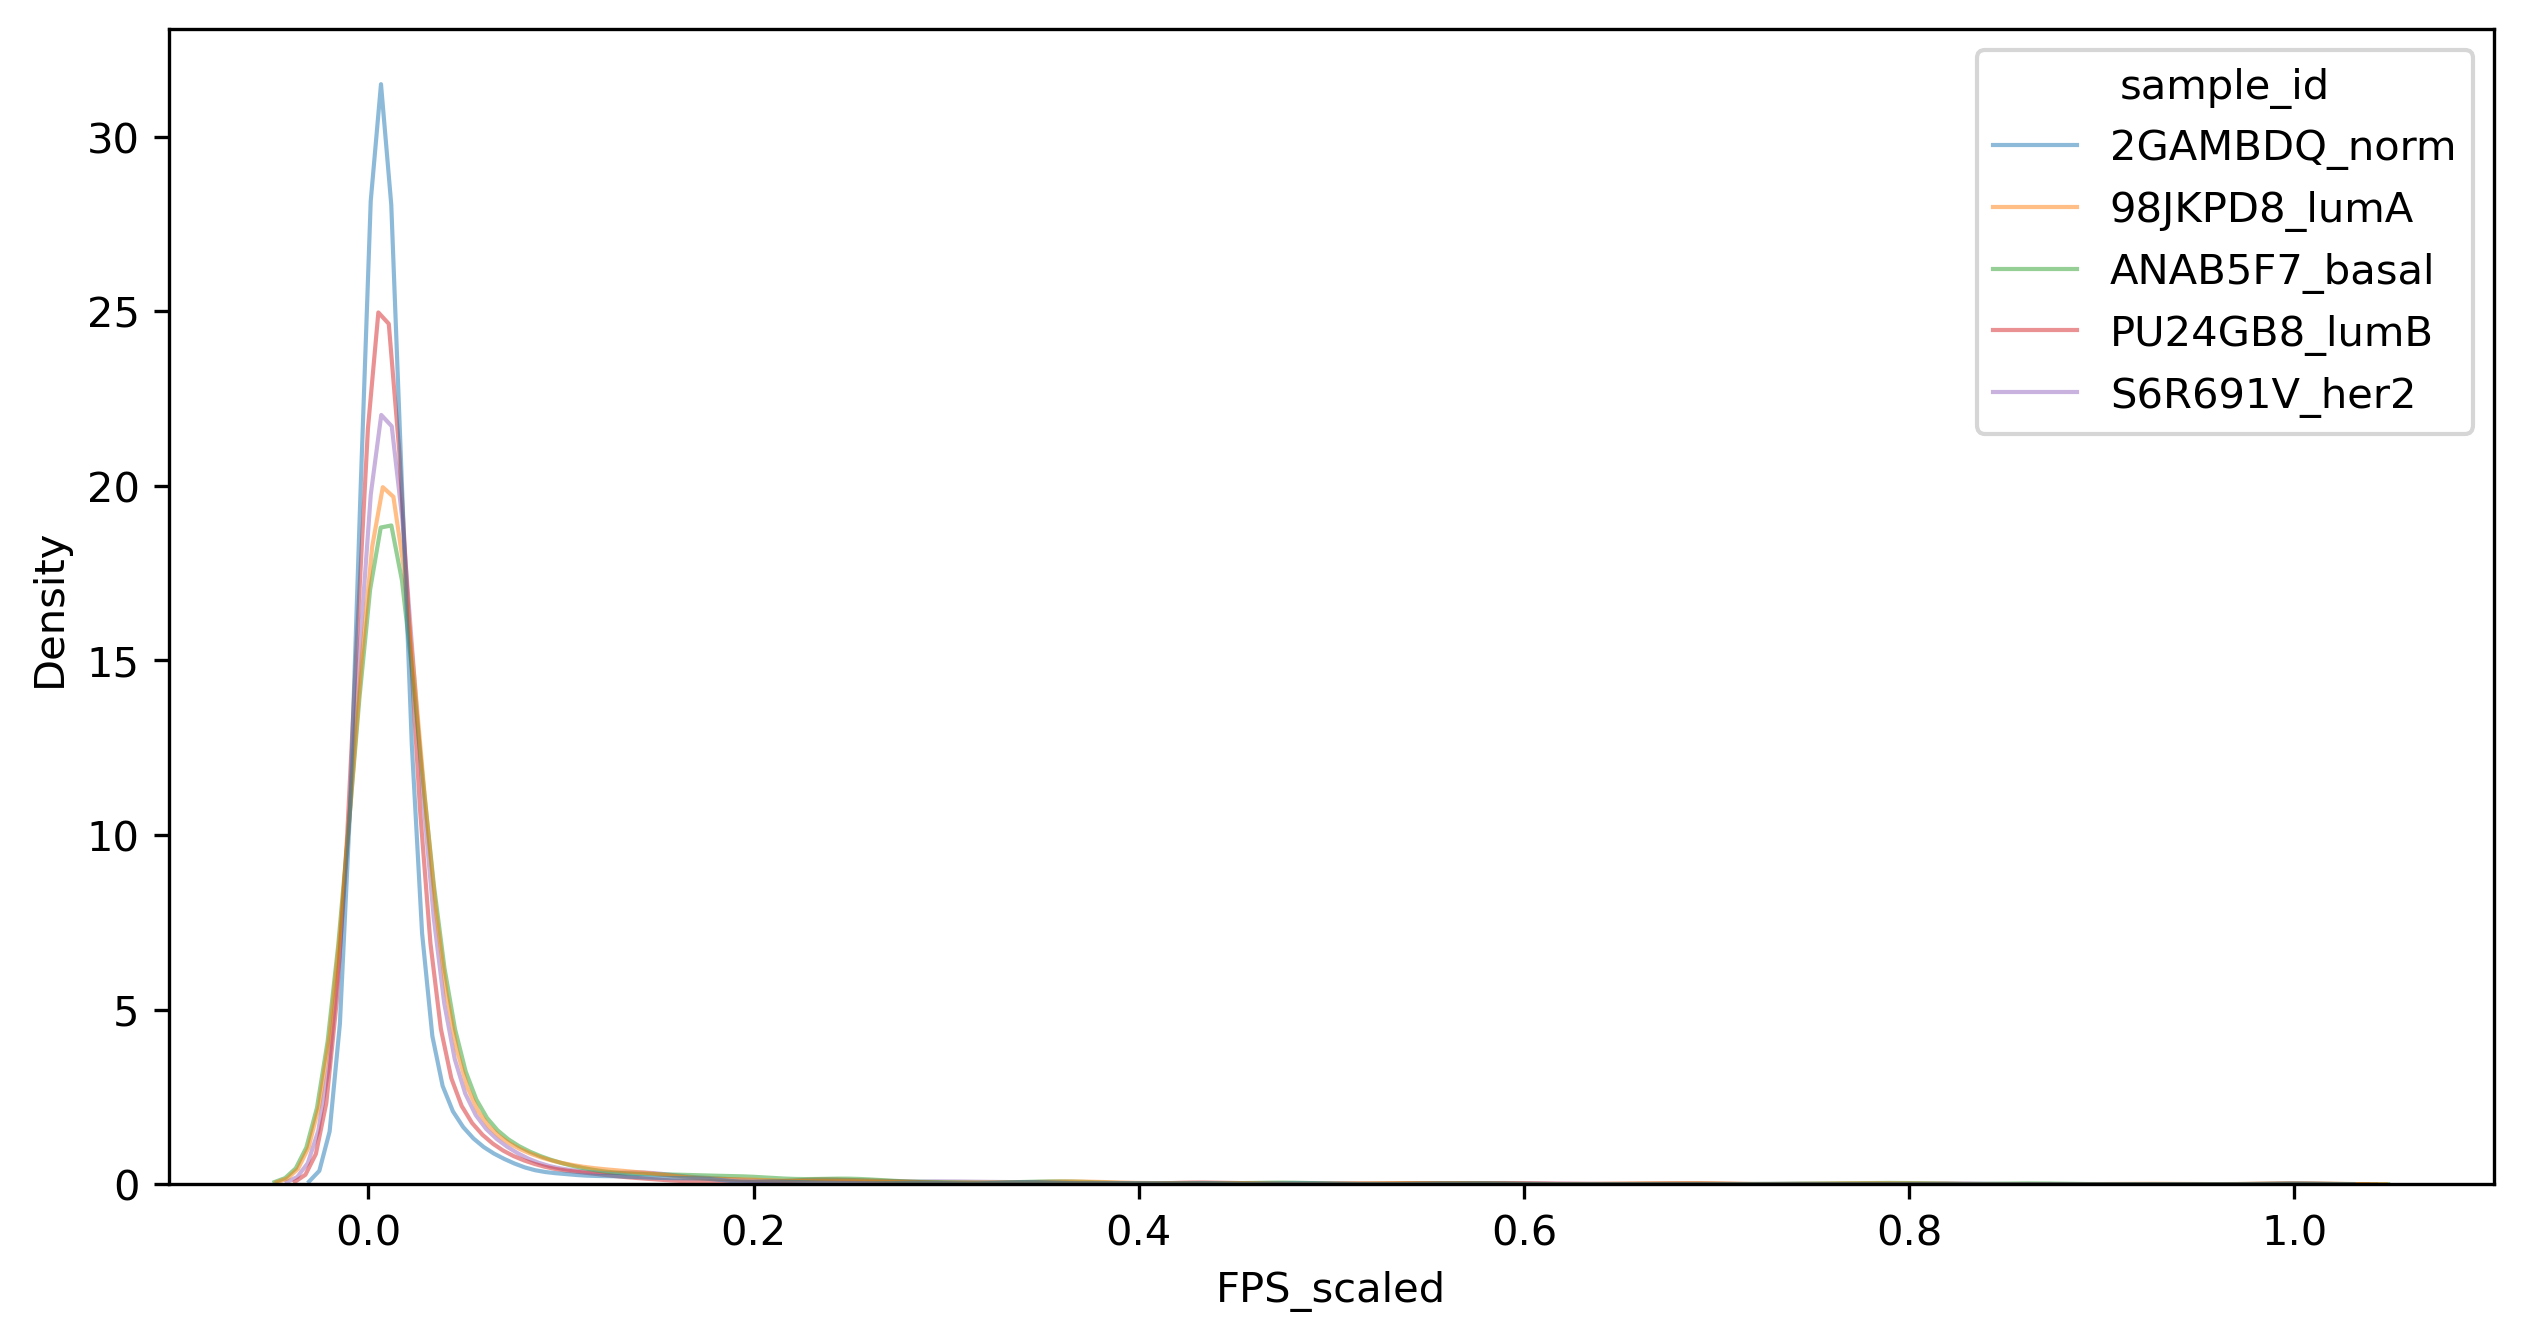

In [127]:
# plot fps distribution
plt.figure(figsize=(10, 5), dpi=300)
sns.kdeplot(data=fps_df_scaled_lpv, x="FPS_scaled", hue="sample_id", fill=False, common_norm=False, alpha=.5, linewidth=1)
plt.show()

### Merging `afps_df_lpv` and `fps_df_scaled_lpv`

Now we can merge the two long dataframes together to get both raw FPS and scaled FPS values in one dataframe.

In [128]:
afps_df_lpv

region_id      sample_id        AF      FPS
0            chr1:993422-993431   2GAMBDQ_norm  0.000000  0.02014
1            chr1:993422-993431   98JKPD8_lumA  0.041667  0.02053
2            chr1:993422-993431  ANAB5F7_basal  0.000000  0.02728
3            chr1:993422-993431   PU24GB8_lumB  0.000000  0.02564
4            chr1:993422-993431   S6R691V_her2  0.000000  0.02598
...                         ...            ...       ...      ...
10840  chrX:154303670-154303679   2GAMBDQ_norm  0.000000  0.01385
10841  chrX:154303670-154303679   98JKPD8_lumA  0.000000  0.01392
10842  chrX:154303670-154303679  ANAB5F7_basal  0.000000  0.00957
10843  chrX:154303670-154303679   PU24GB8_lumB  0.035714  0.01013
10844  chrX:154303670-154303679   S6R691V_her2  0.035714  0.01154

[10845 rows x 4 columns]

In [129]:
fps_df_scaled_lpv

region_id      sample_id  FPS_scaled
0            chr1:993422-993431   2GAMBDQ_norm    0.004716
1            chr1:993422-993431   98JKPD8_lumA    0.008052
2            chr1:993422-993431  ANAB5F7_basal    0.011125
3            chr1:993422-993431   PU24GB8_lumB    0.007454
4            chr1:993422-993431   S6R691V_her2    0.009013
...                         ...            ...         ...
10840  chrX:154303670-154303679   2GAMBDQ_norm    0.003243
10841  chrX:154303670-154303679   98JKPD8_lumA    0.005459
10842  chrX:154303670-154303679  ANAB5F7_basal    0.003903
10843  chrX:154303670-154303679   PU24GB8_lumB    0.002945
10844  chrX:154303670-154303679   S6R691V_her2    0.004004

[10845 rows x 3 columns]

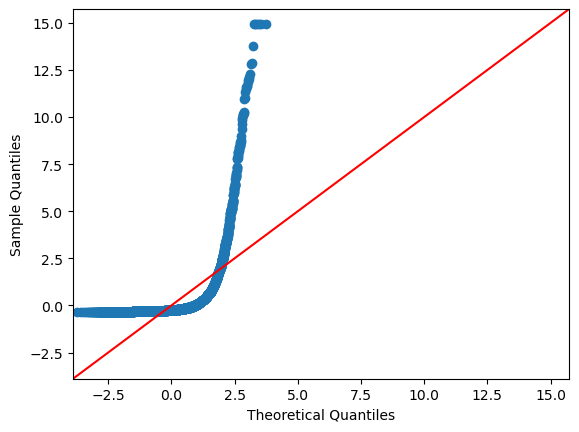

In [130]:
fig = sm.qqplot(fps_df_scaled_lpv['FPS_scaled'], line='45', fit=True)
plt.show()

In [131]:
# merge two dataframes on region_id and sample_id
afps_full_dfl = afps_df_lpv.merge(fps_df_scaled_lpv, on=['region_id', 'sample_id'])
afps_full_dfl

region_id      sample_id        AF      FPS  FPS_scaled
0            chr1:993422-993431   2GAMBDQ_norm  0.000000  0.02014    0.004716
1            chr1:993422-993431   98JKPD8_lumA  0.041667  0.02053    0.008052
2            chr1:993422-993431  ANAB5F7_basal  0.000000  0.02728    0.011125
3            chr1:993422-993431   PU24GB8_lumB  0.000000  0.02564    0.007454
4            chr1:993422-993431   S6R691V_her2  0.000000  0.02598    0.009013
...                         ...            ...       ...      ...         ...
10840  chrX:154303670-154303679   2GAMBDQ_norm  0.000000  0.01385    0.003243
10841  chrX:154303670-154303679   98JKPD8_lumA  0.000000  0.01392    0.005459
10842  chrX:154303670-154303679  ANAB5F7_basal  0.000000  0.00957    0.003903
10843  chrX:154303670-154303679   PU24GB8_lumB  0.035714  0.01013    0.002945
10844  chrX:154303670-154303679   S6R691V_her2  0.035714  0.01154    0.004004

[10845 rows x 5 columns]

In [132]:
# save to file
# afps_full_dfl.to_csv(f'/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/AF-FPS_regionsorted_full_longtable/{motif_id}_afps_full_scaled_longtable.tsv', sep='\t', index=False)

In [133]:
dutchfield = ["#e60049", "#0bb4ff", "#87bc45", "#ef9b20", "#b33dc6"]

springpastel = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a"] 

### Calculating Variation Statistics
With the full data table cleaned up into a long format, we can now calculate the variation statistics for each region. We will calculate the following statistics:
* variance (Var)
* ~~coefficient of variation (CV)~~
* ~~quartile coefficient of dispersion (QCD)~~

First calculate statistics on the raw FPS data.

In [134]:
# extract fps columns
fps_df = matrix_afps.filter(regex='_fps$|_id$')
# calculate variance of fps values across samples per region_id and add to a new column called 'fps_var'
fps_df = fps_df.set_index('region_id')
fps_df['FPS_var'] = fps_df.var(axis=1)
# calculate the coefficient of variation (CV) of fps values across samples per region_id and add to a new column called 'fps_cv'
# fps_df['FPS_cv'] = fps_df.drop(columns=['FPS_var']).std(axis=1) / fps_df.drop(columns=['FPS_var']).mean(axis=1) * 100
# calculate the quartile coefficient of dispersion (QCD) of fps values across samples per region_id and add to a new column called 'fps_qcd'
# fps_df['FPS_qcd'] = (fps_df.drop(columns=['FPS_var', 'FPS_cv']).quantile(q=0.75, axis=1) - fps_df.drop(columns=['FPS_var', 'FPS_cv']).quantile(q=0.25, axis=1)) / (fps_df.drop(columns=['FPS_var', 'FPS_cv']).quantile(q=0.75, axis=1) + fps_df.drop(columns=['FPS_var', 'FPS_cv']).quantile(q=0.25, axis=1))
fps_df

98JKPD8_lumA_fps  ANAB5F7_basal_fps  \
region_id                                                       
chr1:993422-993431                 0.02053            0.02728   
chr1:1001102-1001111               0.09632            0.06152   
chr1:1518492-1518501               0.02580            0.02505   
chr1:1777677-1777686               0.12475            0.14795   
chr1:1960035-1960044               0.07746            0.07199   
...                                    ...                ...   
chrX:123087236-123087245           0.01470            0.03244   
chrX:130594731-130594740           0.01808            0.20345   
chrX:131803340-131803349           0.05328            0.04116   
chrX:151702406-151702415           0.01706            0.00927   
chrX:154303670-154303679           0.01392            0.00957   

                          S6R691V_her2_fps  PU24GB8_lumB_fps  \
region_id                                                      
chr1:993422-993431                 0.02598           0.02564   
chr1:1001102-1001111               0.06417           0.08330   
chr1:1518492-1518501               0.02546           0.02915   
chr1:1777677-1777686               0.11166           0.17105   
chr1:1960035-1960044               0.06761           0.07313   
...                                    ...               ...   
chrX:123087236-123087245           0.01832           0.01871   
chrX:130594731-130594740           0.02755           0.01750   
chrX:131803340-131803349           0.08867           0.09568   
chrX:151702406-151702415           0.01469           0.01248   
chrX:154303670-154303679           0.01154           0.01013   

                          2GAMBDQ_norm_fps   FPS_var  
region_id                                             
chr1:993422-993431                 0.02014  0.000011  
chr1:1001102-1001111               0.07206  0.000207  
chr1:1518492-1518501               0.02805  0.000003  
chr1:1777677-1777686               0.15533  0.000569  
chr1:1960035-1960044               0.06865  0.000015  
...                                    ...       ...  
chrX:123087236-123087245           0.01186  0.000063  
chrX:130594731-130594740           0.02644  0.006578  
chrX:131803340-131803349           0.05889  0.000553  
chrX:151702406-151702415           0.01844  0.000013  
chrX:154303670-154303679           0.01385  0.000004  

[2169 rows x 6 columns]

Then do the same on the fps scaled data.

In [135]:
# calculate variance of fps_scaled values across samples per region_id and add to a new column called 'fps_scaled_var'
fps_df_scaled['FPS_scaled_var'] = fps_df_scaled.var(axis=1)
# calculate the coefficient of variation (CV) of fps values across samples per region_id and add to a new column called 'fps_scaled_cv'
# fps_df_scaled['FPS_scaled_cv'] = fps_df_scaled.drop(columns=['FPS_scaled_var']).std(axis=1) / fps_df_scaled.drop(columns=['FPS_scaled_var']).mean(axis=1) * 100
# calculate the quartile coefficient of dispersion (QCD) of fps values across samples per region_id and add to a new column called 'fps_scaled_qcd'
# fps_df_scaled['FPS_scaled_qcd'] = (fps_df_scaled.drop(columns=['FPS_scaled_var', 'FPS_scaled_cv']).quantile(q=0.75, axis=1) - fps_df_scaled.drop(columns=['FPS_scaled_var', 'FPS_scaled_cv']).quantile(q=0.25, axis=1)) / (fps_df_scaled.drop(columns=['FPS_scaled_var', 'FPS_scaled_cv']).quantile(q=0.75, axis=1) + fps_df_scaled.drop(columns=['FPS_scaled_var', 'FPS_scaled_cv']).quantile(q=0.25, axis=1))
fps_df_scaled

98JKPD8_lumA_fps_scaled  ANAB5F7_basal_fps_scaled  \
region_id                                                                     
chr1:993422-993431                       0.008052                  0.011125   
chr1:1001102-1001111                     0.037775                  0.025087   
chr1:1518492-1518501                     0.010118                  0.010215   
chr1:1777677-1777686                     0.048925                  0.060333   
chr1:1960035-1960044                     0.030379                  0.029357   
...                                           ...                       ...   
chrX:123087236-123087245                 0.005765                  0.013229   
chrX:130594731-130594740                 0.007091                  0.082965   
chrX:131803340-131803349                 0.020896                  0.016785   
chrX:151702406-151702415                 0.006691                  0.003780   
chrX:154303670-154303679                 0.005459                  0.003903   

                          S6R691V_her2_fps_scaled  PU24GB8_lumB_fps_scaled  \
region_id                                                                    
chr1:993422-993431                       0.009013                 0.007454   
chr1:1001102-1001111                     0.022263                 0.024215   
chr1:1518492-1518501                     0.008833                 0.008474   
chr1:1777677-1777686                     0.038738                 0.049724   
chr1:1960035-1960044                     0.023456                 0.021259   
...                                           ...                      ...   
chrX:123087236-123087245                 0.006356                 0.005439   
chrX:130594731-130594740                 0.009558                 0.005087   
chrX:131803340-131803349                 0.030762                 0.027814   
chrX:151702406-151702415                 0.005096                 0.003628   
chrX:154303670-154303679                 0.004004                 0.002945   

                          2GAMBDQ_norm_fps_scaled  FPS_scaled_var  
region_id                                                          
chr1:993422-993431                       0.004716    5.462399e-06  
chr1:1001102-1001111                     0.016874    5.926593e-05  
chr1:1518492-1518501                     0.006568    2.205055e-06  
chr1:1777677-1777686                     0.036372    9.248172e-05  
chr1:1960035-1960044                     0.016075    3.498479e-05  
...                                           ...             ...  
chrX:123087236-123087245                 0.002777    1.514881e-05  
chrX:130594731-130594740                 0.006191    1.157414e-03  
chrX:131803340-131803349                 0.013790    5.160294e-05  
chrX:151702406-151702415                 0.004318    1.565276e-06  
chrX:154303670-154303679                 0.003243    9.462896e-07  

[2169 rows x 6 columns]

Now merge the two statistics tables together on `region_id` index.

In [136]:
# subset only the fps stats columns
# fps_stats_df = fps_df.filter(regex='_var$|_cv$|_qcd$|_id$').copy()
# fps_scaled_stats_df = fps_df_scaled.filter(regex='_var$|_cv$|_qcd$|_id$').copy()
fps_stats_df = fps_df.filter(regex='_var$|_id$').copy()
fps_scaled_stats_df = fps_df_scaled.filter(regex='_var$|_id$').copy()
# merge on region_id index from both tables
fps_stats_all_df = fps_stats_df.merge(fps_scaled_stats_df, left_index=True, right_index=True)
fps_stats_all_df

FPS_var  FPS_scaled_var
region_id                                         
chr1:993422-993431        0.000011    5.462399e-06
chr1:1001102-1001111      0.000207    5.926593e-05
chr1:1518492-1518501      0.000003    2.205055e-06
chr1:1777677-1777686      0.000569    9.248172e-05
chr1:1960035-1960044      0.000015    3.498479e-05
...                            ...             ...
chrX:123087236-123087245  0.000063    1.514881e-05
chrX:130594731-130594740  0.006578    1.157414e-03
chrX:131803340-131803349  0.000553    5.160294e-05
chrX:151702406-151702415  0.000013    1.565276e-06
chrX:154303670-154303679  0.000004    9.462896e-07

[2169 rows x 2 columns]

Now we have two different sets of stats data to merge with the long form AF_FPS table.

In [137]:
# set the index to 'region_id'
afps_full_dfl_ind = afps_full_dfl.set_index('region_id')
afps_full_dfl_ind

sample_id        AF      FPS  FPS_scaled
region_id                                                             
chr1:993422-993431         2GAMBDQ_norm  0.000000  0.02014    0.004716
chr1:993422-993431         98JKPD8_lumA  0.041667  0.02053    0.008052
chr1:993422-993431        ANAB5F7_basal  0.000000  0.02728    0.011125
chr1:993422-993431         PU24GB8_lumB  0.000000  0.02564    0.007454
chr1:993422-993431         S6R691V_her2  0.000000  0.02598    0.009013
...                                 ...       ...      ...         ...
chrX:154303670-154303679   2GAMBDQ_norm  0.000000  0.01385    0.003243
chrX:154303670-154303679   98JKPD8_lumA  0.000000  0.01392    0.005459
chrX:154303670-154303679  ANAB5F7_basal  0.000000  0.00957    0.003903
chrX:154303670-154303679   PU24GB8_lumB  0.035714  0.01013    0.002945
chrX:154303670-154303679   S6R691V_her2  0.035714  0.01154    0.004004

[10845 rows x 4 columns]

In [138]:
# merge afps_full_dfl_ind with stats df on region_id
fps_merged_stats = afps_full_dfl_ind.merge(fps_stats_all_df, left_index=True, right_index=True, how='left')

# sort naturally by region_id
fps_merged_stats_sorted =fps_merged_stats.reset_index().reindex(index=index_natsorted(fps_merged_stats.index))
fps_merged_stats_sorted

region_id      sample_id        AF      FPS  FPS_scaled  \
4890         chr1:993422-993431   2GAMBDQ_norm  0.000000  0.02014    0.004716   
4891         chr1:993422-993431   98JKPD8_lumA  0.041667  0.02053    0.008052   
4892         chr1:993422-993431  ANAB5F7_basal  0.000000  0.02728    0.011125   
4893         chr1:993422-993431   PU24GB8_lumB  0.000000  0.02564    0.007454   
4894         chr1:993422-993431   S6R691V_her2  0.000000  0.02598    0.009013   
...                         ...            ...       ...      ...         ...   
10720  chrX:154303670-154303679   2GAMBDQ_norm  0.000000  0.01385    0.003243   
10721  chrX:154303670-154303679   98JKPD8_lumA  0.000000  0.01392    0.005459   
10722  chrX:154303670-154303679  ANAB5F7_basal  0.000000  0.00957    0.003903   
10723  chrX:154303670-154303679   PU24GB8_lumB  0.035714  0.01013    0.002945   
10724  chrX:154303670-154303679   S6R691V_her2  0.035714  0.01154    0.004004   

        FPS_var  FPS_scaled_var  
4890   0.000011    5.462399e-06  
4891   0.000011    5.462399e-06  
4892   0.000011    5.462399e-06  
4893   0.000011    5.462399e-06  
4894   0.000011    5.462399e-06  
...         ...             ...  
10720  0.000004    9.462896e-07  
10721  0.000004    9.462896e-07  
10722  0.000004    9.462896e-07  
10723  0.000004    9.462896e-07  
10724  0.000004    9.462896e-07  

[10845 rows x 7 columns]

In [139]:
# save file 
# fps_merged_stats_sorted.to_csv(f'/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/AF-FPS_regionsorted_full_longtable/{motif_id}_afps_full_scaled_longtable_with_stats.tsv', sep='\t', index=False)

### Filtering Variant Sites (FPS)
From here on, it makes sense to filter out variant sites that has `FPS` value `== 0`, or `FPS_cv` or `FPS_qcd` values `== NaN`. This means that the raw FPS values across subtypes are zero, i.e. there is no evidence of footprinting at all at these sites despite a TFBS matching a motif being present (assigned by TOBIAS), leading to an undefined CV and QCD value.

In [140]:
# filter out unique region_id rows that have fps == 0
# group by 'region_id' first 
merged_filt = fps_merged_stats_sorted.groupby('region_id').filter(lambda x: x['FPS'].sum() > 0)
merged_filt

region_id      sample_id        AF      FPS  FPS_scaled  \
4890         chr1:993422-993431   2GAMBDQ_norm  0.000000  0.02014    0.004716   
4891         chr1:993422-993431   98JKPD8_lumA  0.041667  0.02053    0.008052   
4892         chr1:993422-993431  ANAB5F7_basal  0.000000  0.02728    0.011125   
4893         chr1:993422-993431   PU24GB8_lumB  0.000000  0.02564    0.007454   
4894         chr1:993422-993431   S6R691V_her2  0.000000  0.02598    0.009013   
...                         ...            ...       ...      ...         ...   
10720  chrX:154303670-154303679   2GAMBDQ_norm  0.000000  0.01385    0.003243   
10721  chrX:154303670-154303679   98JKPD8_lumA  0.000000  0.01392    0.005459   
10722  chrX:154303670-154303679  ANAB5F7_basal  0.000000  0.00957    0.003903   
10723  chrX:154303670-154303679   PU24GB8_lumB  0.035714  0.01013    0.002945   
10724  chrX:154303670-154303679   S6R691V_her2  0.035714  0.01154    0.004004   

        FPS_var  FPS_scaled_var  
4890   0.000011    5.462399e-06  
4891   0.000011    5.462399e-06  
4892   0.000011    5.462399e-06  
4893   0.000011    5.462399e-06  
4894   0.000011    5.462399e-06  
...         ...             ...  
10720  0.000004    9.462896e-07  
10721  0.000004    9.462896e-07  
10722  0.000004    9.462896e-07  
10723  0.000004    9.462896e-07  
10724  0.000004    9.462896e-07  

[10675 rows x 7 columns]

In [141]:
# merged_filt[(merged_filt['FPS_cv'].isna() | merged_filt['FPS_qcd'].isna())]

We are not interested in footprints that carry no called variants so we can also filter out all rows with `AF == 0`, as these represent sites that are not variant at all. The only reason they are in the matrix is because during the raw data merging, these sites are retained when there is at least one subtype that has a non-zero AF value at that site, or non-zero FPS values at that site.

However, we would still be interested in sites with AF values not equal zero at least in one of the subtypes, so we do not want to filter out sites that have at least one non-zero AF value.

In [142]:
# filter out unique region_id rows that have AF == 0 in all subtypes (sample_id grouping)
# this has to be per group, so we need to groupby first
merged_filt = merged_filt.groupby('region_id').filter(lambda x: (x['AF'] != 0).any())
merged_filt

region_id      sample_id        AF      FPS  FPS_scaled  \
4890         chr1:993422-993431   2GAMBDQ_norm  0.000000  0.02014    0.004716   
4891         chr1:993422-993431   98JKPD8_lumA  0.041667  0.02053    0.008052   
4892         chr1:993422-993431  ANAB5F7_basal  0.000000  0.02728    0.011125   
4893         chr1:993422-993431   PU24GB8_lumB  0.000000  0.02564    0.007454   
4894         chr1:993422-993431   S6R691V_her2  0.000000  0.02598    0.009013   
...                         ...            ...       ...      ...         ...   
10720  chrX:154303670-154303679   2GAMBDQ_norm  0.000000  0.01385    0.003243   
10721  chrX:154303670-154303679   98JKPD8_lumA  0.000000  0.01392    0.005459   
10722  chrX:154303670-154303679  ANAB5F7_basal  0.000000  0.00957    0.003903   
10723  chrX:154303670-154303679   PU24GB8_lumB  0.035714  0.01013    0.002945   
10724  chrX:154303670-154303679   S6R691V_her2  0.035714  0.01154    0.004004   

        FPS_var  FPS_scaled_var  
4890   0.000011    5.462399e-06  
4891   0.000011    5.462399e-06  
4892   0.000011    5.462399e-06  
4893   0.000011    5.462399e-06  
4894   0.000011    5.462399e-06  
...         ...             ...  
10720  0.000004    9.462896e-07  
10721  0.000004    9.462896e-07  
10722  0.000004    9.462896e-07  
10723  0.000004    9.462896e-07  
10724  0.000004    9.462896e-07  

[10025 rows x 7 columns]

Now we can select unique `region_id`s that have at least one AF value in the subtype group that is equal to 0 AND the max AF value in the subtype group is more than 0.5. This is because for sites that have a called variant in at least one subtype, we are only interested in them if the called variant has AF of more than 0.5.

We first group the df by the unique values of column `region_id`, then we retain only regions whose max value of column `AF` per unique site is more than 0.5.

In [143]:
# for each unique region_id, find those that has AF == 0 in at least one subtype
# this has to be per group, so we need to groupby first
region_af_zero = merged_filt.groupby('region_id').filter(lambda x: (x['AF'] == 0).any())

# then find the max AF value for each region_id and add to a new column called 'max_AF'
df = region_af_zero.groupby('region_id').agg({'AF': 'max'}).rename(columns={'AF': 'max_AF'}).reset_index()
max_af = df.reindex(index=index_natsorted(df['region_id']))
max_af

region_id    max_AF
639         chr1:993422-993431  0.041667
513       chr1:1001102-1001111  0.062500
528       chr1:1518492-1518501  0.055556
555       chr1:1960035-1960044  0.147059
557       chr1:1981486-1981495  0.142857
...                        ...       ...
1360  chrX:123087236-123087245  0.031250
1361  chrX:130594731-130594740  0.029412
1362  chrX:131803340-131803349  0.035714
1363  chrX:151702406-151702415  0.026316
1364  chrX:154303670-154303679  0.035714

[1379 rows x 2 columns]

In [144]:
# now return a boolean mask for regions that have max_AF <= 0.5
mask = max_af['max_AF'] <= 0.5
mask.sum()

1369

Now we can filter the merged dataframes such that rows that have `region_id` in the Boolean-masked `max_af` dataframe will be discarded.

In [145]:
# this is done by subsetting the long dataframe with an expression that makes use of isin() method on the max_af dataframe masked by the boolean series, and then taking the inverse of the expression using ~
merged_filt = merged_filt[~(merged_filt['region_id'].isin(max_af[mask]['region_id']))]
merged_filt

region_id      sample_id        AF      FPS  FPS_scaled  \
4225       chr1:1777677-1777686   2GAMBDQ_norm  0.125000  0.15533    0.036372   
4226       chr1:1777677-1777686   98JKPD8_lumA  0.083333  0.12475    0.048925   
4227       chr1:1777677-1777686  ANAB5F7_basal  0.117647  0.14795    0.060333   
4228       chr1:1777677-1777686   PU24GB8_lumB  0.105263  0.17105    0.049724   
4229       chr1:1777677-1777686   S6R691V_her2  0.058824  0.11166    0.038738   
...                         ...            ...       ...      ...         ...   
10695  chrX:121365715-121365724   2GAMBDQ_norm  0.642857  0.01358    0.003180   
10696  chrX:121365715-121365724   98JKPD8_lumA  0.312500  0.00828    0.003247   
10697  chrX:121365715-121365724  ANAB5F7_basal  0.250000  0.00680    0.002773   
10698  chrX:121365715-121365724   PU24GB8_lumB  0.323529  0.01572    0.004570   
10699  chrX:121365715-121365724   S6R691V_her2  0.433333  0.02816    0.009770   

        FPS_var  FPS_scaled_var  
4225   0.000569        0.000092  
4226   0.000569        0.000092  
4227   0.000569        0.000092  
4228   0.000569        0.000092  
4229   0.000569        0.000092  
...         ...             ...  
10695  0.000072        0.000008  
10696  0.000072        0.000008  
10697  0.000072        0.000008  
10698  0.000072        0.000008  
10699  0.000072        0.000008  

[3180 rows x 7 columns]

### Filtering Variant Sites (AF)
Now we can calculate the median for AF values to append to the merged, filtered longform dataframe.

In [146]:
# copy the filtered dataframe
mf_df = merged_filt.copy()
mf_df = mf_df.reset_index(drop=True)
# calculate AF median per region_id
mf_df['AF_median'] = mf_df.groupby('region_id')['AF'].transform('median')

In [147]:
mf_df

region_id      sample_id        AF      FPS  FPS_scaled  \
0         chr1:1777677-1777686   2GAMBDQ_norm  0.125000  0.15533    0.036372   
1         chr1:1777677-1777686   98JKPD8_lumA  0.083333  0.12475    0.048925   
2         chr1:1777677-1777686  ANAB5F7_basal  0.117647  0.14795    0.060333   
3         chr1:1777677-1777686   PU24GB8_lumB  0.105263  0.17105    0.049724   
4         chr1:1777677-1777686   S6R691V_her2  0.058824  0.11166    0.038738   
...                        ...            ...       ...      ...         ...   
3175  chrX:121365715-121365724   2GAMBDQ_norm  0.642857  0.01358    0.003180   
3176  chrX:121365715-121365724   98JKPD8_lumA  0.312500  0.00828    0.003247   
3177  chrX:121365715-121365724  ANAB5F7_basal  0.250000  0.00680    0.002773   
3178  chrX:121365715-121365724   PU24GB8_lumB  0.323529  0.01572    0.004570   
3179  chrX:121365715-121365724   S6R691V_her2  0.433333  0.02816    0.009770   

       FPS_var  FPS_scaled_var  AF_median  
0     0.000569        0.000092   0.105263  
1     0.000569        0.000092   0.105263  
2     0.000569        0.000092   0.105263  
3     0.000569        0.000092   0.105263  
4     0.000569        0.000092   0.105263  
...        ...             ...        ...  
3175  0.000072        0.000008   0.323529  
3176  0.000072        0.000008   0.323529  
3177  0.000072        0.000008   0.323529  
3178  0.000072        0.000008   0.323529  
3179  0.000072        0.000008   0.323529  

[3180 rows x 8 columns]

In [148]:
mf_df.groupby('region_id')['AF'].transform('var')

0       0.000729
1       0.000729
2       0.000729
3       0.000729
4       0.000729
          ...   
3175    0.023952
3176    0.023952
3177    0.023952
3178    0.023952
3179    0.023952
Name: AF, Length: 3180, dtype: float64

In [149]:
# calculate the variance of AF per region_id and add to a new column called 'AF_var'
mf_df['AF_var'] = mf_df.groupby('region_id')['AF'].transform('var')
# mf_df['AF_cv'] = mf_df.groupby('region_id')['AF'].transform(lambda x: x.std() / x.mean() * 100)

# set a small constant for QCD calculation to prevent NaN due to division by zero
# constant = 0.0001
# mf_df['AF_qcd'] = mf_df.groupby('region_id')['AF'].transform(lambda x: (x.quantile(q=0.75) - x.quantile(q=0.25)) / (x.quantile(q=0.75) + x.quantile(q=0.25) + constant))
mf_df

region_id      sample_id        AF      FPS  FPS_scaled  \
0         chr1:1777677-1777686   2GAMBDQ_norm  0.125000  0.15533    0.036372   
1         chr1:1777677-1777686   98JKPD8_lumA  0.083333  0.12475    0.048925   
2         chr1:1777677-1777686  ANAB5F7_basal  0.117647  0.14795    0.060333   
3         chr1:1777677-1777686   PU24GB8_lumB  0.105263  0.17105    0.049724   
4         chr1:1777677-1777686   S6R691V_her2  0.058824  0.11166    0.038738   
...                        ...            ...       ...      ...         ...   
3175  chrX:121365715-121365724   2GAMBDQ_norm  0.642857  0.01358    0.003180   
3176  chrX:121365715-121365724   98JKPD8_lumA  0.312500  0.00828    0.003247   
3177  chrX:121365715-121365724  ANAB5F7_basal  0.250000  0.00680    0.002773   
3178  chrX:121365715-121365724   PU24GB8_lumB  0.323529  0.01572    0.004570   
3179  chrX:121365715-121365724   S6R691V_her2  0.433333  0.02816    0.009770   

       FPS_var  FPS_scaled_var  AF_median    AF_var  
0     0.000569        0.000092   0.105263  0.000729  
1     0.000569        0.000092   0.105263  0.000729  
2     0.000569        0.000092   0.105263  0.000729  
3     0.000569        0.000092   0.105263  0.000729  
4     0.000569        0.000092   0.105263  0.000729  
...        ...             ...        ...       ...  
3175  0.000072        0.000008   0.323529  0.023952  
3176  0.000072        0.000008   0.323529  0.023952  
3177  0.000072        0.000008   0.323529  0.023952  
3178  0.000072        0.000008   0.323529  0.023952  
3179  0.000072        0.000008   0.323529  0.023952  

[3180 rows x 9 columns]

Let's visualize the AF distribution for each variant site.

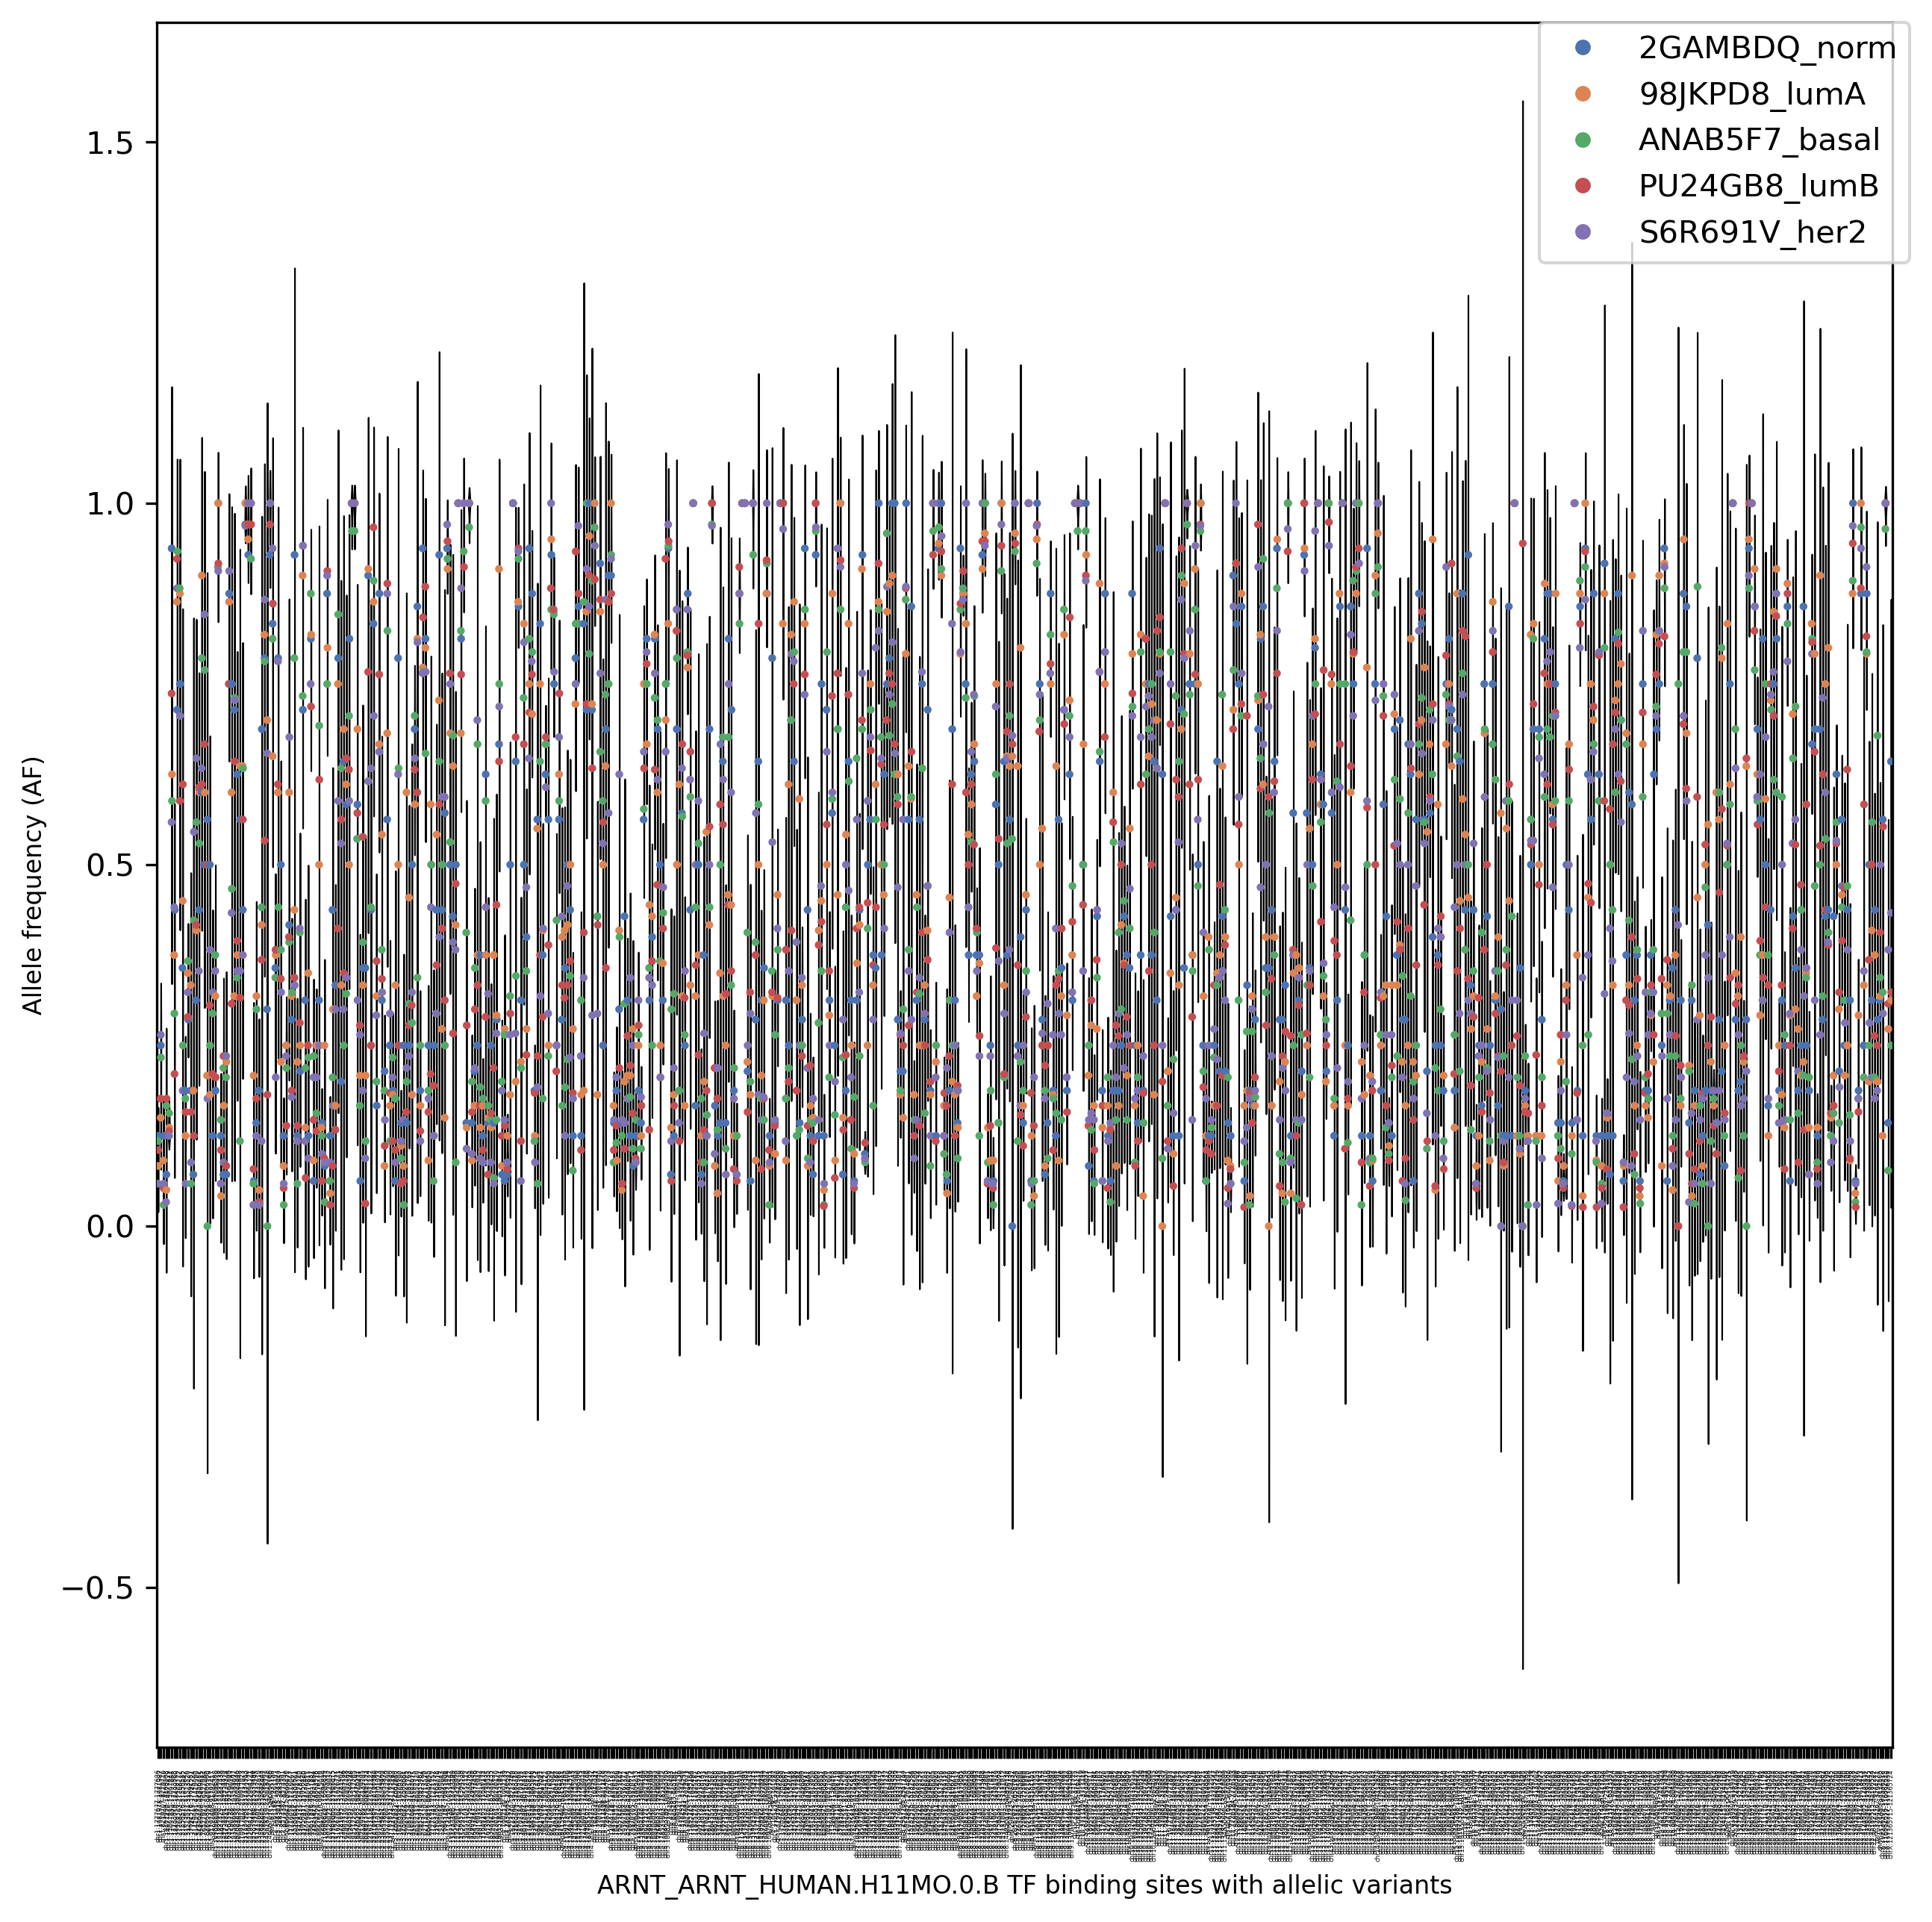

In [150]:
# plot violin plot for AF on the filtered dataframe
plt.figure(figsize=(10, 10), dpi=300)
sns.violinplot(x='region_id', y='AF', data=mf_df, color='lightgray', inner='quartile', linecolor='black', linewidth=0.5)
plt.xticks(rotation=90, fontsize=2)
sns.stripplot(x='region_id', y='AF', data=mf_df, hue='sample_id', size=2.5, jitter=True, palette='deep')


# plot legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)
plt.xlabel(f'{motif_id} TF binding sites with allelic variants', fontsize=8)
plt.ylabel('Allele frequency (AF)', fontsize=8)
plt.show()

Plotting the whole data makes the plot look very busy. We can split the data into 2 groups: 'high AF' and 'low AF'. We will define 'high AF' as `AF_median` > 0.5, and 'low AF' as `AF_median` <= 0.5. 

In [151]:
# to ensure that each unique region_id is retained as a group of subtype rows, we need to filter after grouping per region_id
high_af = mf_df.groupby('region_id').filter(lambda x: (x['AF_median'] > 0.5).any())
high_af

region_id      sample_id        AF      FPS  FPS_scaled  \
25      chr1:17097835-17097844   2GAMBDQ_norm  0.937500  0.21430    0.050181   
26      chr1:17097835-17097844   98JKPD8_lumA  0.625000  0.06822    0.026755   
27      chr1:17097835-17097844  ANAB5F7_basal  0.588235  0.24838    0.101287   
28      chr1:17097835-17097844   PU24GB8_lumB  0.736842  0.07468    0.021710   
29      chr1:17097835-17097844   S6R691V_her2  0.558824  0.12656    0.043908   
...                        ...            ...       ...      ...         ...   
3165  chrX:116882616-116882625   2GAMBDQ_norm  1.000000  0.02000    0.004683   
3166  chrX:116882616-116882625   98JKPD8_lumA  1.000000  0.01458    0.005718   
3167  chrX:116882616-116882625  ANAB5F7_basal  0.964286  0.00882    0.003597   
3168  chrX:116882616-116882625   PU24GB8_lumB  1.000000  0.01397    0.004061   
3169  chrX:116882616-116882625   S6R691V_her2  1.000000  0.01491    0.005173   

       FPS_var  FPS_scaled_var  AF_median    AF_var  
25    0.006665    1.000161e-03      0.625  0.023809  
26    0.006665    1.000161e-03      0.625  0.023809  
27    0.006665    1.000161e-03      0.625  0.023809  
28    0.006665    1.000161e-03      0.625  0.023809  
29    0.006665    1.000161e-03      0.625  0.023809  
...        ...             ...        ...       ...  
3165  0.000016    7.178102e-07      1.000  0.000255  
3166  0.000016    7.178102e-07      1.000  0.000255  
3167  0.000016    7.178102e-07      1.000  0.000255  
3168  0.000016    7.178102e-07      1.000  0.000255  
3169  0.000016    7.178102e-07      1.000  0.000255  

[1255 rows x 9 columns]

In [152]:
# low_af = mf_df.groupby('region_id').filter(lambda x: (x['AF_median'] <= 0.5).any())
# low_af

In [153]:
# # plot violin plot for high AF set
# plt.figure(figsize=(10, 10), dpi=300)
# sns.violinplot(x='region_id', y='AF', data=high_af, color='lightgray', inner='quartile', linecolor='black', linewidth=0.5)
# plt.xticks(rotation=90, fontsize=2)
# sns.stripplot(x='region_id', y='AF', data=high_af, hue='sample_id', size=2.5, jitter=True, palette='deep')


# # plot legend outside of the plot
# plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)
# plt.xlabel(f'{motif_id} TF binding sites with allelic variants (median AF > 0.5)', fontsize=8)
# plt.ylabel('Allele frequency (AF)', fontsize=8)
# plt.show()

In [154]:
# # plot violin plot for low AF set
# plt.figure(figsize=(10, 10), dpi=300)
# sns.violinplot(x='region_id', y='AF', data=low_af, color='lightgray', inner='quartile', linecolor='black', linewidth=0.5)
# plt.xticks(rotation=90, fontsize=2)
# sns.stripplot(x='region_id', y='AF', data=low_af, hue='sample_id', size=2.5, jitter=True, palette='deep')


# # plot legend outside of the plot
# plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)
# plt.xlabel(f'{motif_id} TF binding sites with allelic variants (median AF <= 0.5)', fontsize=8)
# plt.ylabel('Allele frequency (AF)', fontsize=8)
# plt.show()

There are definitely sites that have individual subtype with AF == 0 retained, which means that there are sites with high variance. We can filter and plot only these regions to see which subtype it is.

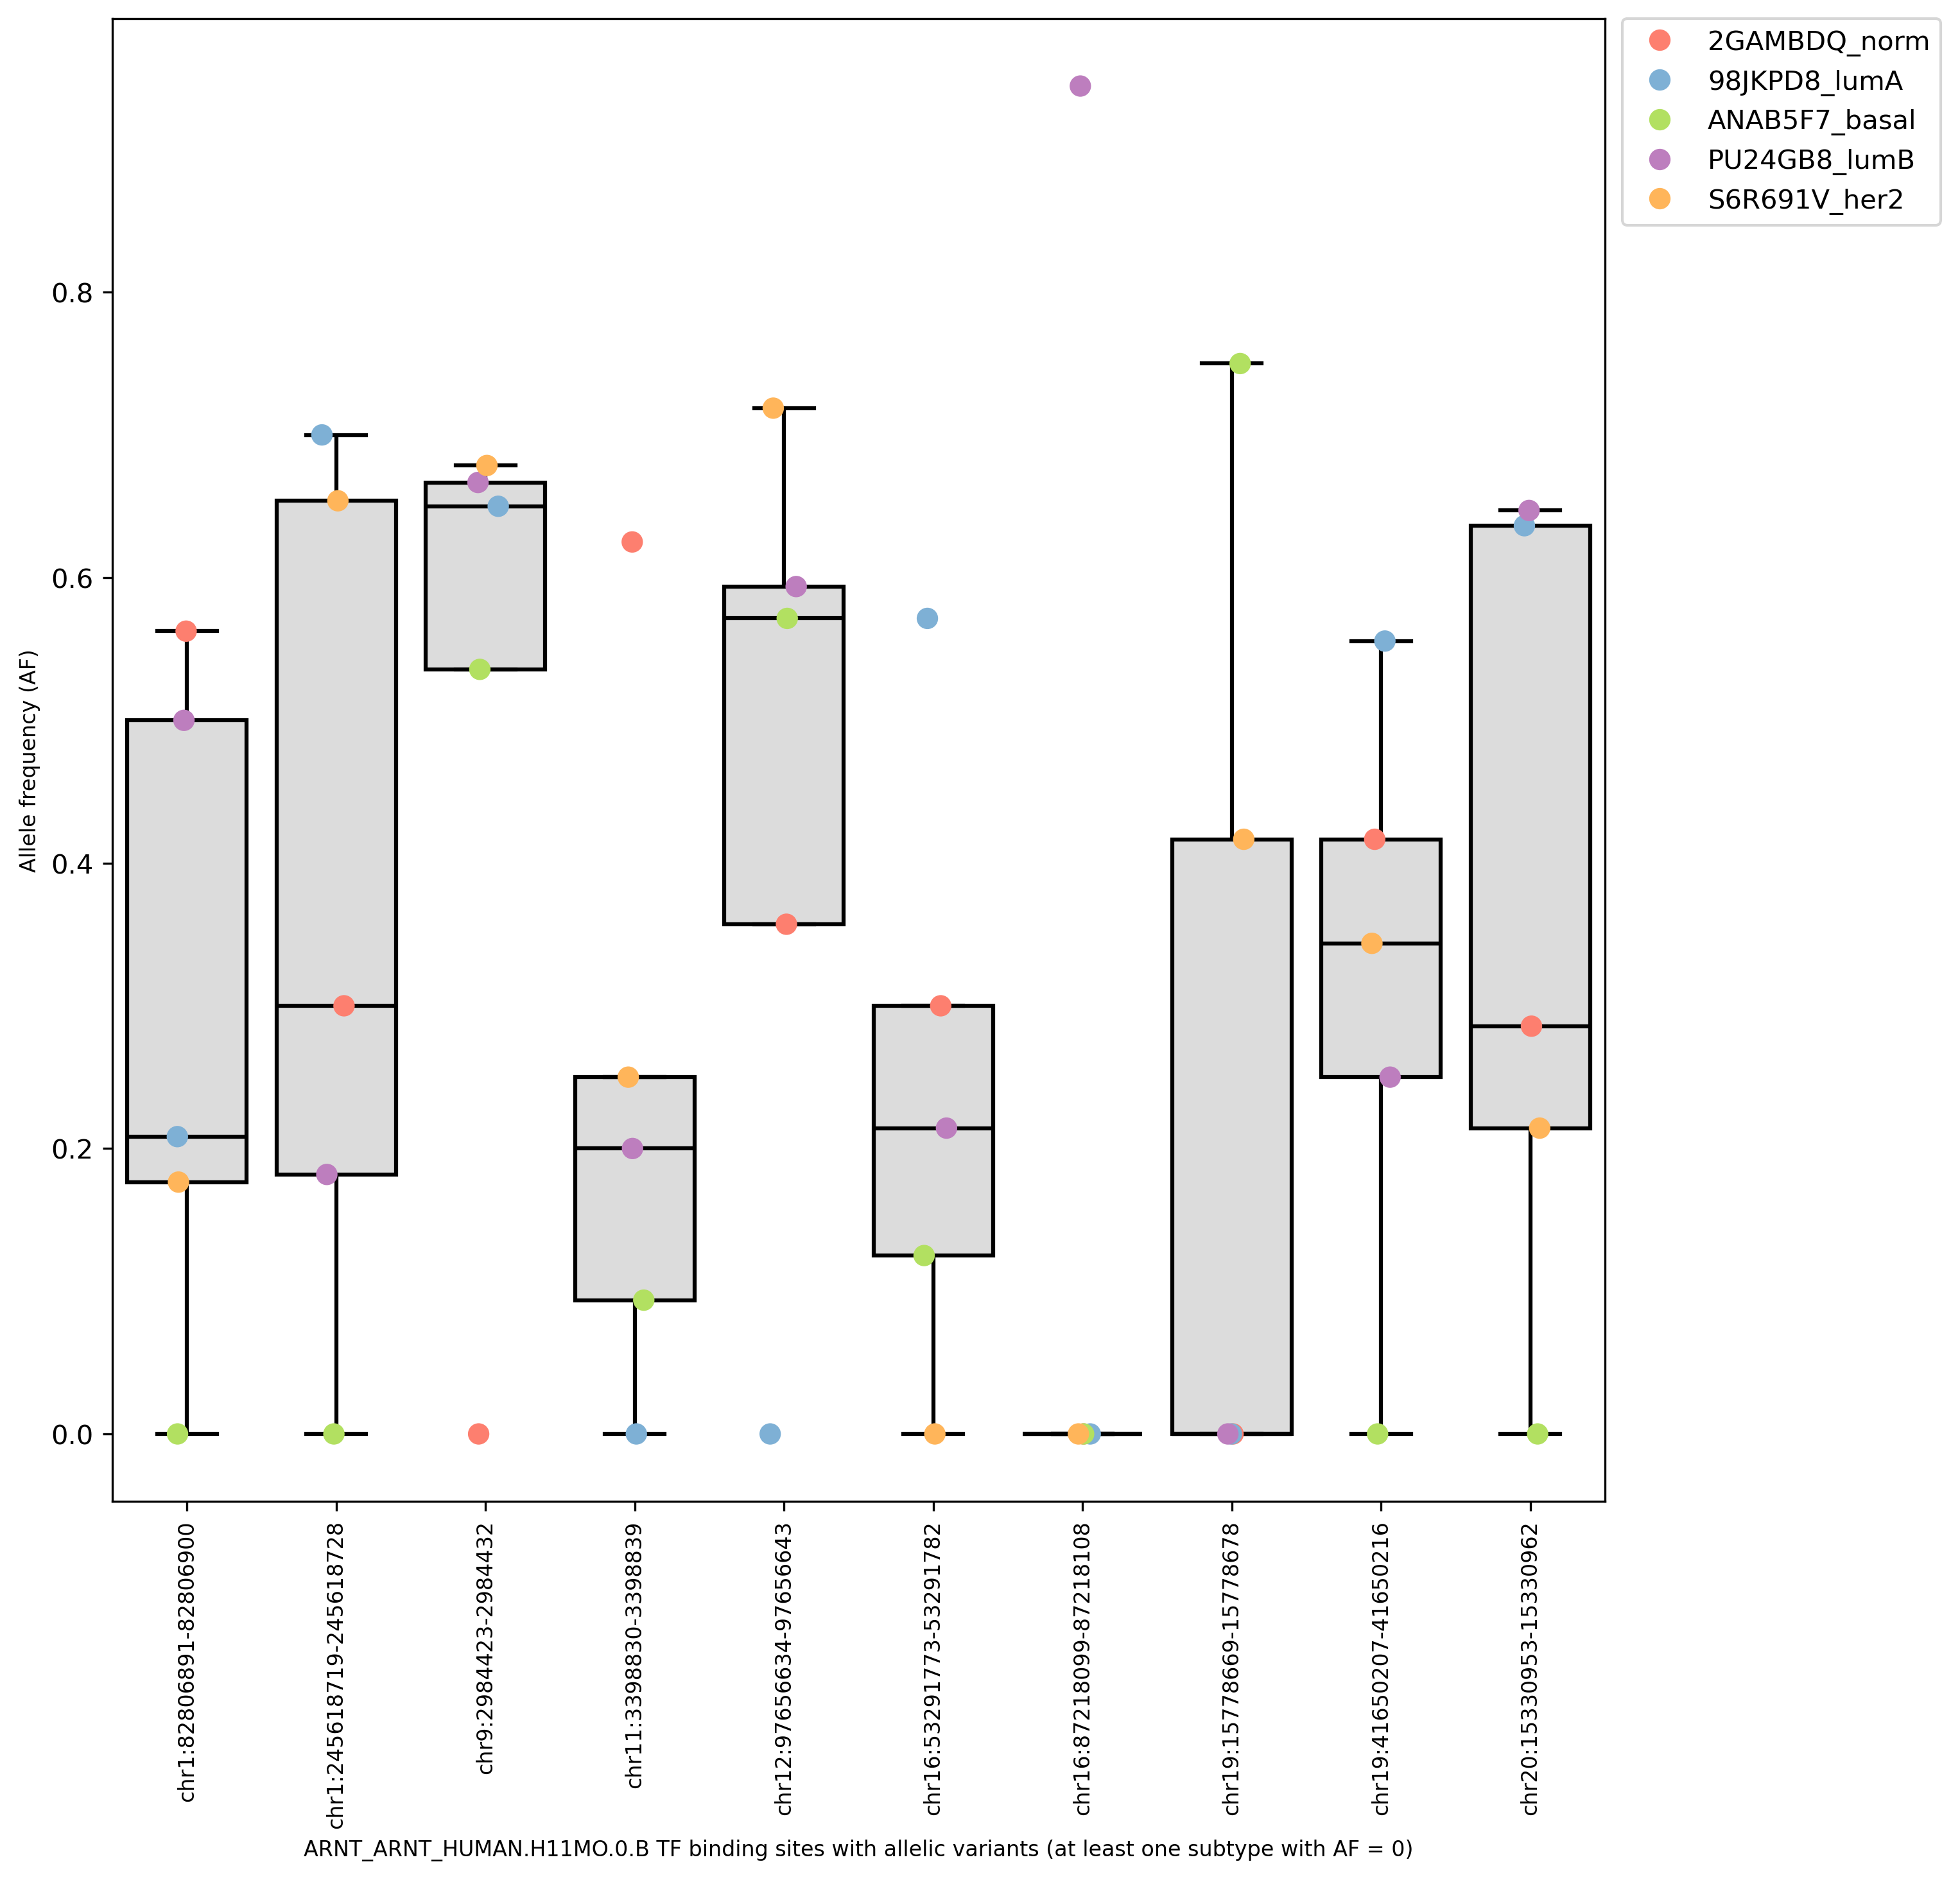

In [155]:
# plot violin plot for sites with at least one subtype with AF == 0
plt.figure(figsize=(10, 10), dpi=300)
sns.boxplot(x='region_id', y='AF', data=mf_df.groupby('region_id').filter(lambda x: (x['AF'] == 0).any()), color='gainsboro', linecolor='black', linewidth=1.5, showfliers=False)
plt.xticks(rotation=90, fontsize=8)
sns.stripplot(x='region_id', y='AF', data=mf_df.groupby('region_id').filter(lambda x: (x['AF'] == 0).any()), hue='sample_id', size=8, jitter=True, palette=springpastel)


# plot legend outside of the plot
plt.legend(bbox_to_anchor=(1.225, 1),borderaxespad=0, markerscale=1, fontsize=10)
plt.xlabel(f'{motif_id} TF binding sites with allelic variants (at least one subtype with AF = 0)', fontsize=8)
plt.ylabel('Allele frequency (AF)', fontsize=8)

plt.show()

No clear pattern of enrichment of a specific subtype with high AF compared to the rest can be seen. We can use the subset of these to plot the distribution of the associated FPS values (unscaled). 

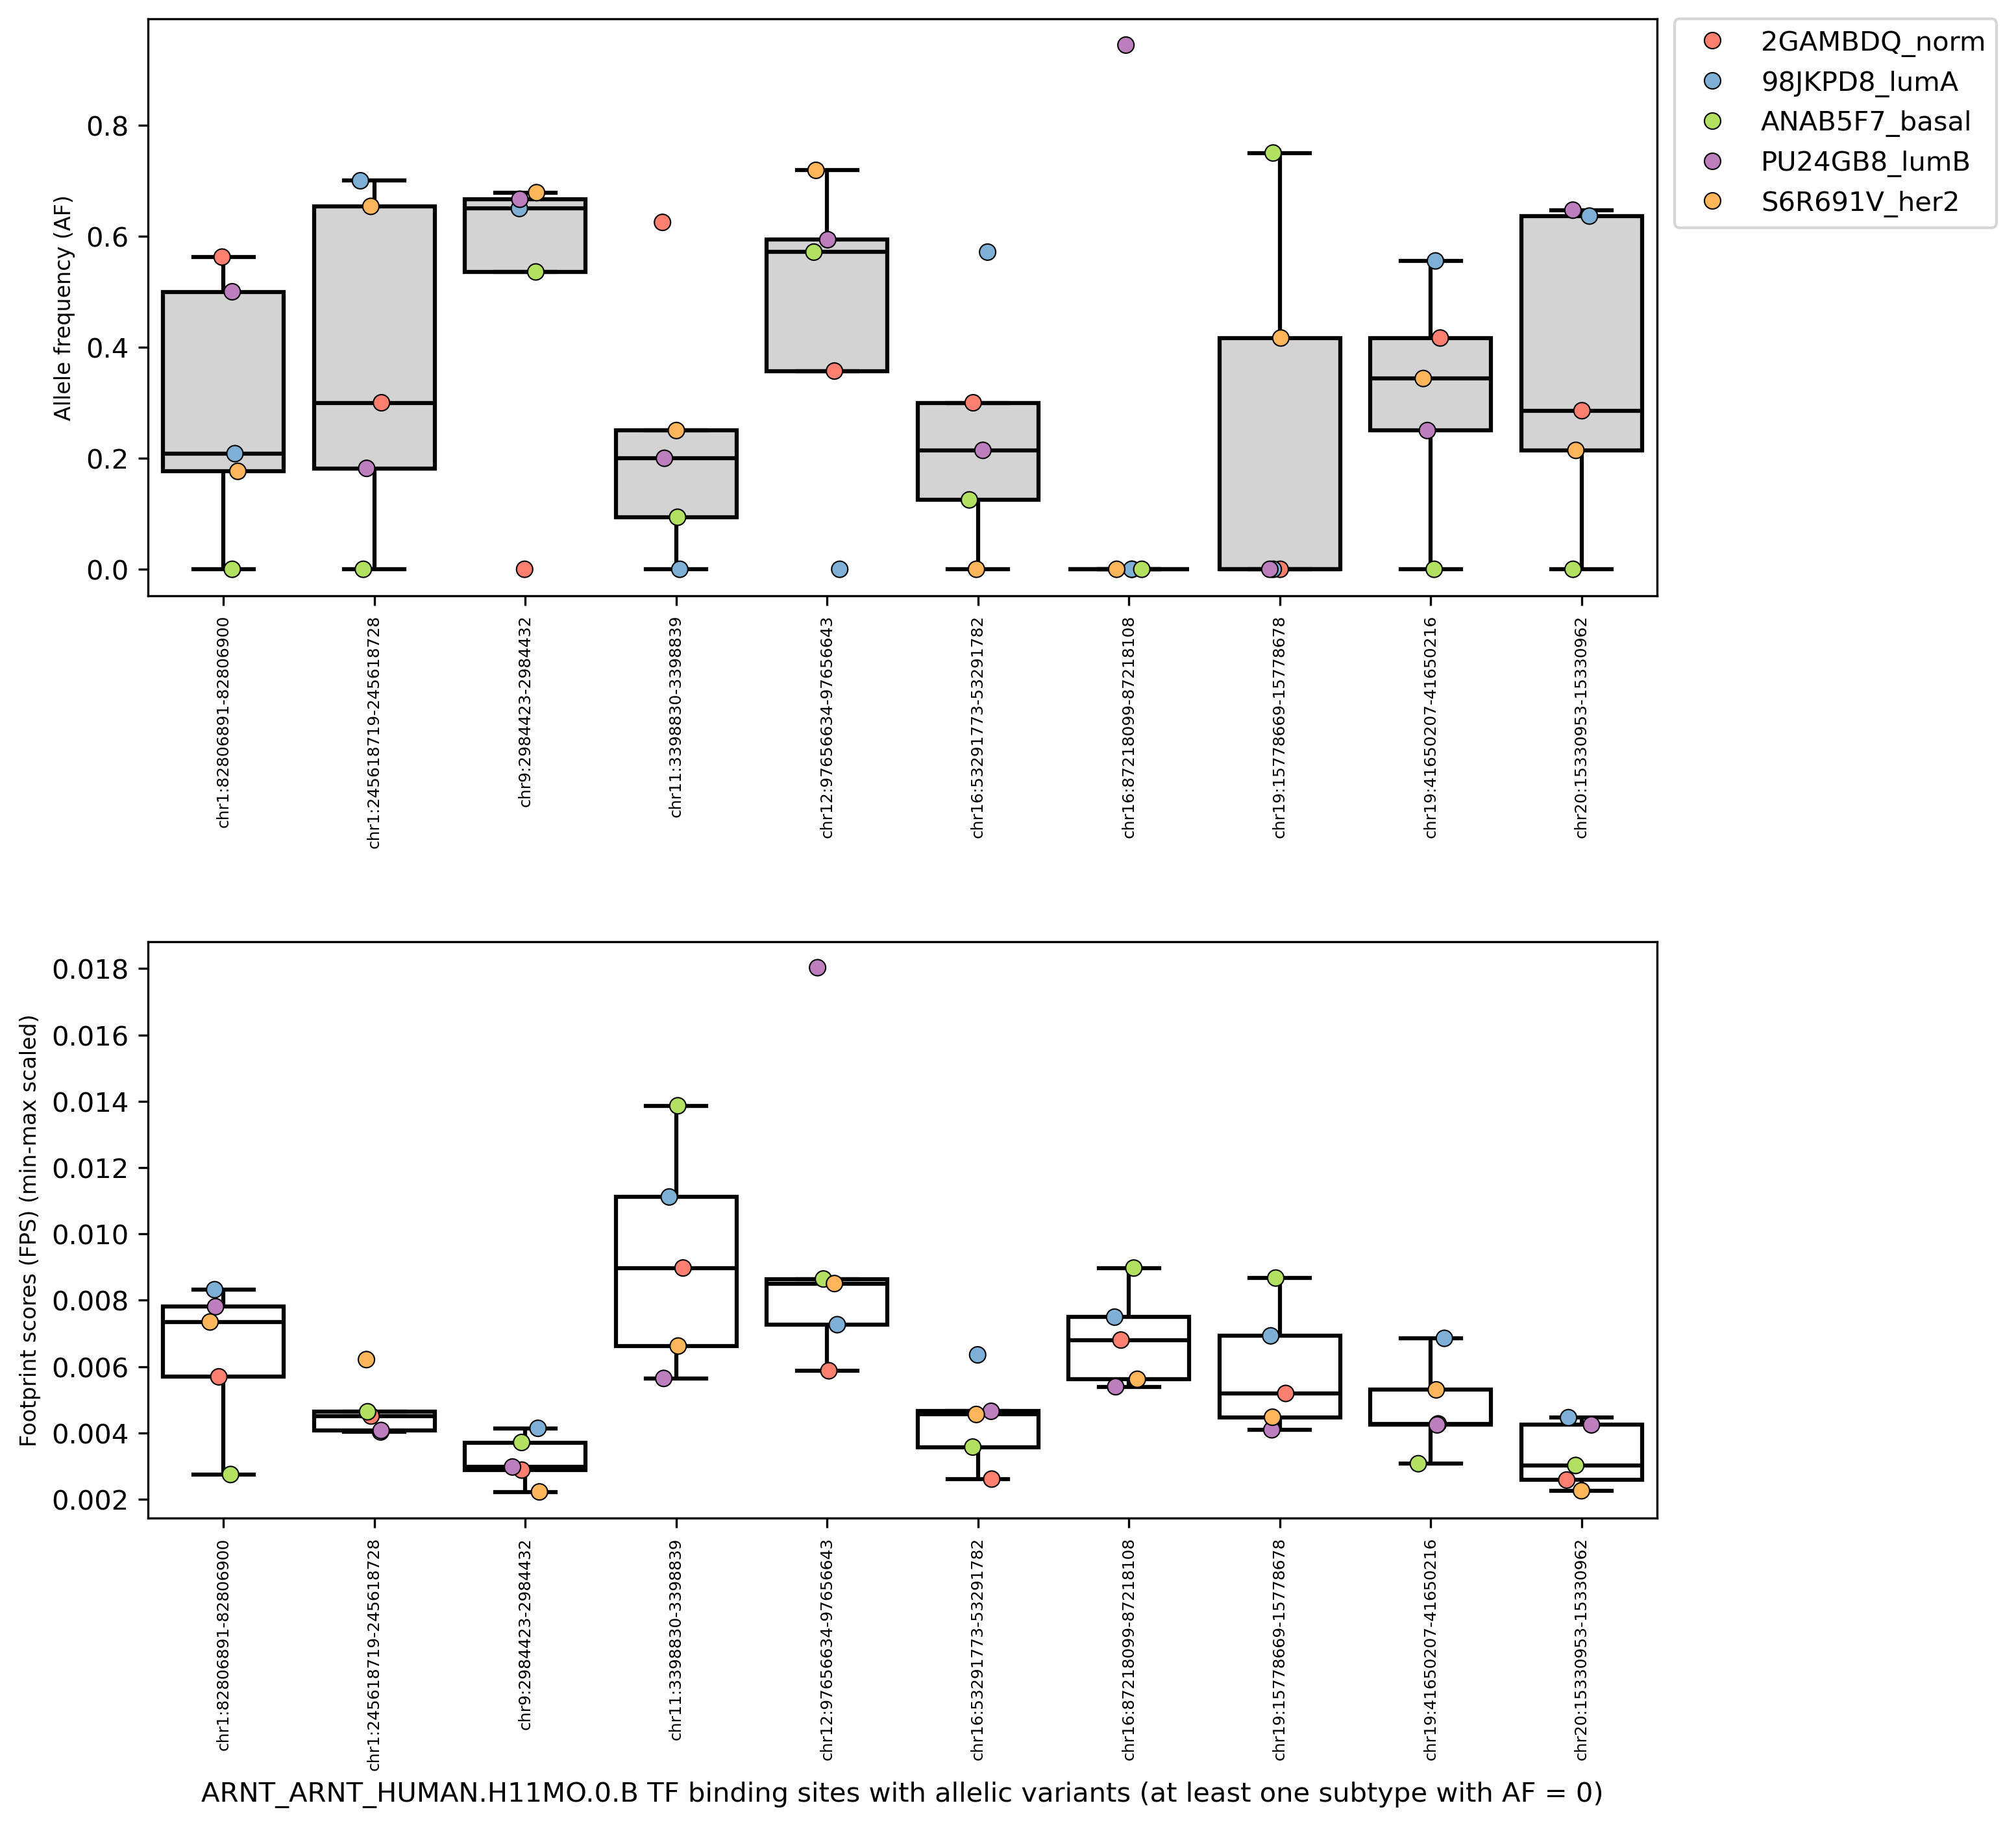

In [156]:
plt.figure(figsize=(10, 10), dpi=300)
plt.subplot(2, 1, 1)
sns.boxplot(x='region_id', y='AF', data=mf_df.groupby('region_id').filter(lambda x: (x['AF'] == 0).any()), color='lightgray', linecolor='black', linewidth=1.5, showfliers=False)
plt.xticks(rotation=90, fontsize=6)
sns.stripplot(x='region_id', y='AF', data=mf_df.groupby('region_id').filter(lambda x: (x['AF'] == 0).any()), hue='sample_id', size=6, jitter=True, palette=springpastel, linewidth=0.5, edgecolor='black')
# plot legend outside of the plot
plt.legend(bbox_to_anchor=(1.225, 1),borderaxespad=0, markerscale=1, fontsize=10)
plt.xlabel('')
plt.ylabel('Allele frequency (AF)', fontsize=8)

# then plot the scaled FPS values for these sites
plt.subplot(2, 1, 2)
sns.boxplot(x='region_id', y='FPS_scaled', data=mf_df.groupby('region_id').filter(lambda x: (x['AF'] == 0).any()), color='white', linecolor='black', linewidth=1.5, showfliers=False)
plt.xticks(rotation=90, fontsize=6)
sns.stripplot(x='region_id', y='FPS_scaled', data=mf_df.groupby('region_id').filter(lambda x: (x['AF'] == 0).any()), hue='sample_id', size=6, jitter=True, palette=springpastel, legend=False, linewidth=0.5, edgecolor='black')
plt.xlabel(f'{motif_id} TF binding sites with allelic variants (at least one subtype with AF = 0)', fontsize=10)
plt.ylabel(f'Footprint scores (FPS) (min-max scaled)', fontsize=8)
plt.subplots_adjust(hspace=0.6)
plt.show()

Some cancer subtypes appear to not have alternative alleles in certain sites but there is barely any pattern of enrichment in FPS values for any specific subtype.

In [157]:
high_af

region_id      sample_id        AF      FPS  FPS_scaled  \
25      chr1:17097835-17097844   2GAMBDQ_norm  0.937500  0.21430    0.050181   
26      chr1:17097835-17097844   98JKPD8_lumA  0.625000  0.06822    0.026755   
27      chr1:17097835-17097844  ANAB5F7_basal  0.588235  0.24838    0.101287   
28      chr1:17097835-17097844   PU24GB8_lumB  0.736842  0.07468    0.021710   
29      chr1:17097835-17097844   S6R691V_her2  0.558824  0.12656    0.043908   
...                        ...            ...       ...      ...         ...   
3165  chrX:116882616-116882625   2GAMBDQ_norm  1.000000  0.02000    0.004683   
3166  chrX:116882616-116882625   98JKPD8_lumA  1.000000  0.01458    0.005718   
3167  chrX:116882616-116882625  ANAB5F7_basal  0.964286  0.00882    0.003597   
3168  chrX:116882616-116882625   PU24GB8_lumB  1.000000  0.01397    0.004061   
3169  chrX:116882616-116882625   S6R691V_her2  1.000000  0.01491    0.005173   

       FPS_var  FPS_scaled_var  AF_median    AF_var  
25    0.006665    1.000161e-03      0.625  0.023809  
26    0.006665    1.000161e-03      0.625  0.023809  
27    0.006665    1.000161e-03      0.625  0.023809  
28    0.006665    1.000161e-03      0.625  0.023809  
29    0.006665    1.000161e-03      0.625  0.023809  
...        ...             ...        ...       ...  
3165  0.000016    7.178102e-07      1.000  0.000255  
3166  0.000016    7.178102e-07      1.000  0.000255  
3167  0.000016    7.178102e-07      1.000  0.000255  
3168  0.000016    7.178102e-07      1.000  0.000255  
3169  0.000016    7.178102e-07      1.000  0.000255  

[1255 rows x 9 columns]

What is the range of FPS variance in the subset dataframe?

In [158]:
high_af[['FPS_scaled_var', 'AF_var']].describe()

FPS_scaled_var       AF_var
count    1.255000e+03  1255.000000
mean     1.285975e-04     0.013624
std      6.025664e-04     0.015562
min      1.318633e-07     0.000000
25%      1.778440e-06     0.002360
50%      5.693254e-06     0.007820
75%      3.226858e-05     0.018723
max      7.501031e-03     0.083312

In [159]:
# subset high_af for sites with FPS_var > 75th percentile + 1.5 * IQR
iqr = high_af['FPS_scaled_var'].quantile(q=0.75) - high_af['FPS_scaled_var'].quantile(q=0.25)
high_af_fps_outliers = high_af[high_af['FPS_scaled_var'] > high_af['FPS_scaled_var'].quantile(q=0.75) + (1.5 * iqr)]

In [160]:
# and then discard sites if it has AF_var == 0
high_nzaf_outliers = high_af_fps_outliers[high_af_fps_outliers['AF_var'] != 0]
high_nzaf_outliers

region_id      sample_id        AF      FPS  FPS_scaled  \
25     chr1:17097835-17097844   2GAMBDQ_norm  0.937500  0.21430    0.050181   
26     chr1:17097835-17097844   98JKPD8_lumA  0.625000  0.06822    0.026755   
27     chr1:17097835-17097844  ANAB5F7_basal  0.588235  0.24838    0.101287   
28     chr1:17097835-17097844   PU24GB8_lumB  0.736842  0.07468    0.021710   
29     chr1:17097835-17097844   S6R691V_her2  0.558824  0.12656    0.043908   
...                       ...            ...       ...      ...         ...   
3105  chr22:27488969-27488978   2GAMBDQ_norm  1.000000  0.14525    0.034012   
3106  chr22:27488969-27488978   98JKPD8_lumA  0.875000  0.12428    0.048741   
3107  chr22:27488969-27488978  ANAB5F7_basal  0.892857  0.02266    0.009241   
3108  chr22:27488969-27488978   PU24GB8_lumB  0.944444  0.15035    0.043707   
3109  chr22:27488969-27488978   S6R691V_her2  0.968750  0.11122    0.038586   

       FPS_var  FPS_scaled_var  AF_median    AF_var  
25    0.006665        0.001000   0.625000  0.023809  
26    0.006665        0.001000   0.625000  0.023809  
27    0.006665        0.001000   0.625000  0.023809  
28    0.006665        0.001000   0.625000  0.023809  
29    0.006665        0.001000   0.625000  0.023809  
...        ...             ...        ...       ...  
3105  0.002675        0.000235   0.944444  0.002705  
3106  0.002675        0.000235   0.944444  0.002705  
3107  0.002675        0.000235   0.944444  0.002705  
3108  0.002675        0.000235   0.944444  0.002705  
3109  0.002675        0.000235   0.944444  0.002705  

[180 rows x 9 columns]

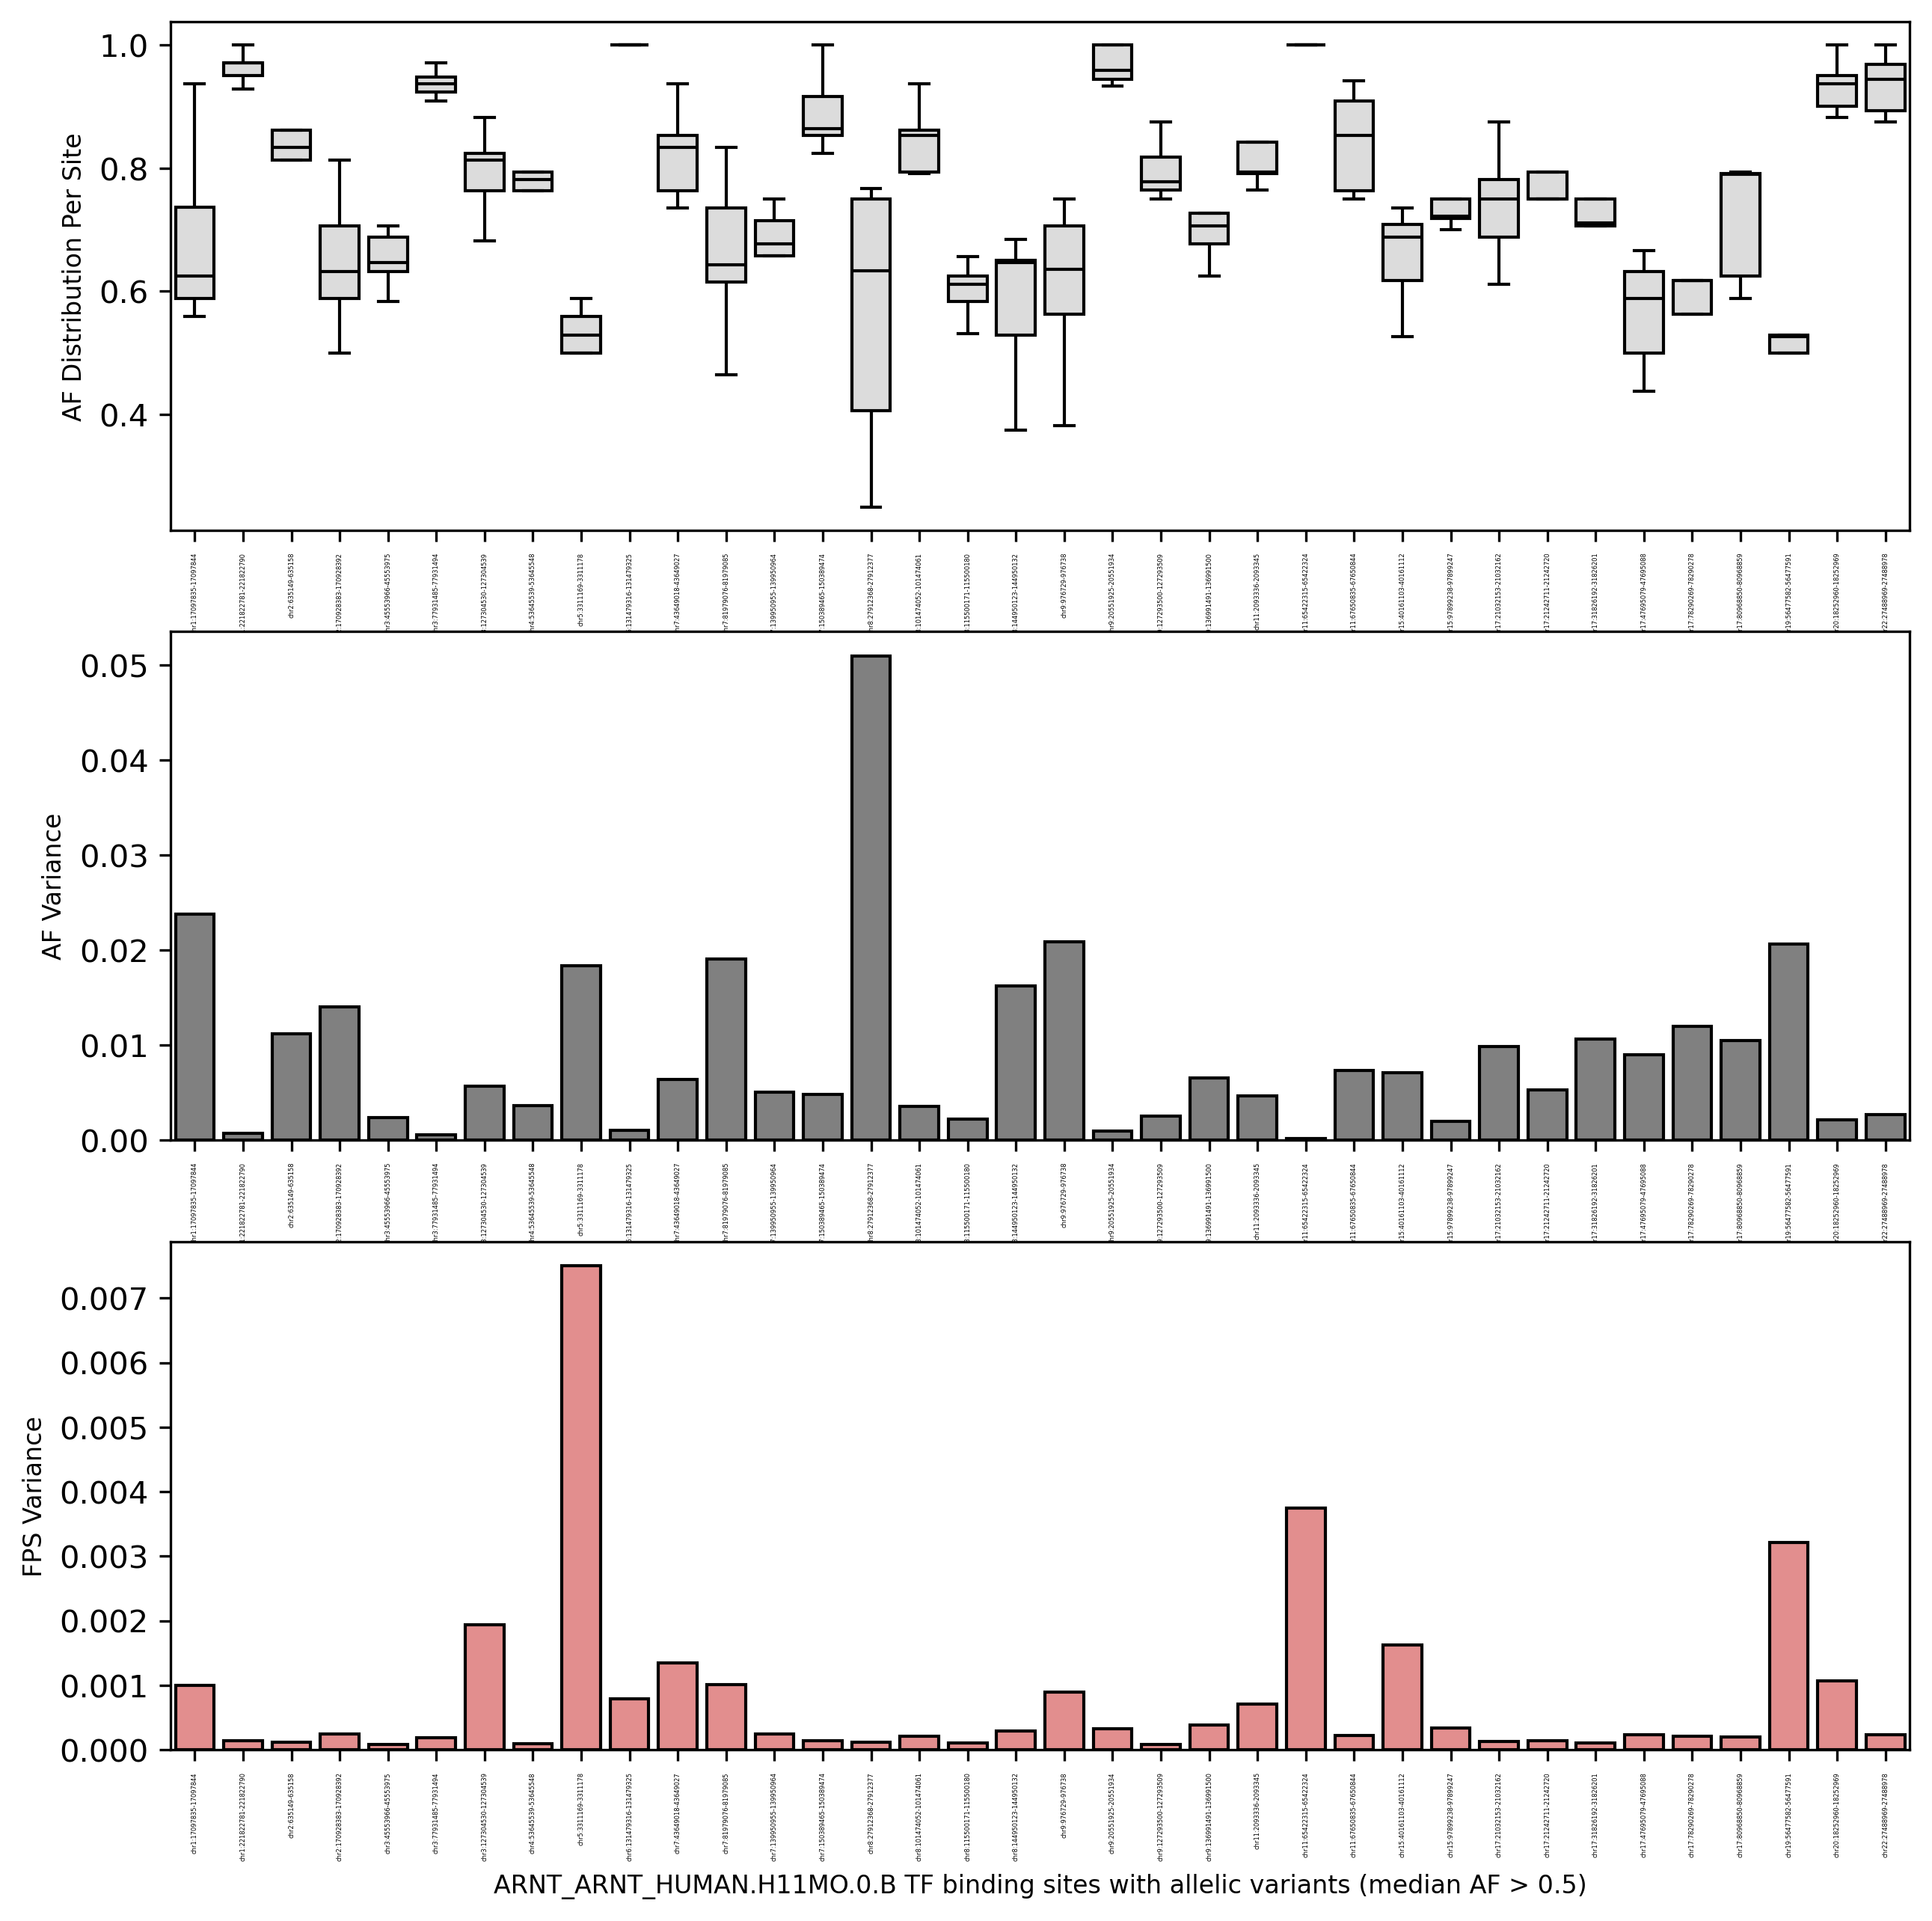

In [161]:
plt.figure(figsize=(10, 10), dpi=300)
# specify subplot
plt.subplot(3, 1, 1)
sns.boxplot(x='region_id', y='AF', data=high_nzaf_outliers, color='gainsboro', linecolor='black', showfliers=False)
plt.xticks(rotation=90, fontsize=2)
plt.xlabel('')
plt.ylabel('AF Distribution Per Site', fontsize=8)

plt.subplot(3, 1, 2)
sns.barplot(x='region_id', y='AF_var', data=high_nzaf_outliers, color='gray', edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel('')
plt.ylabel('AF Variance', fontsize=8)

plt.subplot(3, 1, 3)
sns.barplot(x='region_id', y='FPS_scaled_var', data=high_nzaf_outliers, color='lightcoral', edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
# plt.yscale('log')
plt.xlabel(f'{motif_id} TF binding sites with allelic variants (median AF > 0.5)', fontsize=8)
plt.ylabel('FPS Variance', fontsize=8)

plt.show()

In [162]:
high_af_uniq_reg = high_nzaf_outliers[['region_id', 'AF_var', 'FPS_scaled_var']].drop_duplicates()
# sort the region_id in the filtered high_af dataframe based on descending order of AF_var
afvar_uniqsort = high_af_uniq_reg.sort_values(by='AF_var', ascending=False)
# fpsvar_uniqsort = high_af_uniq_reg.sort_values(by='FPS_scaled_var', ascending=False)

Get the `region_id` ordered list based on AF/FPS variance in descending order.

In [163]:
# extract the region_id from the high_af_fps_var_df_uniqsort dataframe
sorted_region_ids = afvar_uniqsort['region_id']

Using the `region_id` array above, we can filter the `high_af` dataframe to only include the `region_id`s in the array.

In [164]:
high_nzaf_outliers

region_id      sample_id        AF      FPS  FPS_scaled  \
25     chr1:17097835-17097844   2GAMBDQ_norm  0.937500  0.21430    0.050181   
26     chr1:17097835-17097844   98JKPD8_lumA  0.625000  0.06822    0.026755   
27     chr1:17097835-17097844  ANAB5F7_basal  0.588235  0.24838    0.101287   
28     chr1:17097835-17097844   PU24GB8_lumB  0.736842  0.07468    0.021710   
29     chr1:17097835-17097844   S6R691V_her2  0.558824  0.12656    0.043908   
...                       ...            ...       ...      ...         ...   
3105  chr22:27488969-27488978   2GAMBDQ_norm  1.000000  0.14525    0.034012   
3106  chr22:27488969-27488978   98JKPD8_lumA  0.875000  0.12428    0.048741   
3107  chr22:27488969-27488978  ANAB5F7_basal  0.892857  0.02266    0.009241   
3108  chr22:27488969-27488978   PU24GB8_lumB  0.944444  0.15035    0.043707   
3109  chr22:27488969-27488978   S6R691V_her2  0.968750  0.11122    0.038586   

       FPS_var  FPS_scaled_var  AF_median    AF_var  
25    0.006665        0.001000   0.625000  0.023809  
26    0.006665        0.001000   0.625000  0.023809  
27    0.006665        0.001000   0.625000  0.023809  
28    0.006665        0.001000   0.625000  0.023809  
29    0.006665        0.001000   0.625000  0.023809  
...        ...             ...        ...       ...  
3105  0.002675        0.000235   0.944444  0.002705  
3106  0.002675        0.000235   0.944444  0.002705  
3107  0.002675        0.000235   0.944444  0.002705  
3108  0.002675        0.000235   0.944444  0.002705  
3109  0.002675        0.000235   0.944444  0.002705  

[180 rows x 9 columns]

In [165]:
# Change 'region_id' to a categorical variable with the categories ordered by 'fps_sorted_region_ids'
df_copy = high_nzaf_outliers.copy()
df_copy['region_id'] = pd.Categorical(high_nzaf_outliers['region_id'], categories=sorted_region_ids, ordered=True)

# Filter the DataFrame
high_nzaf_outlie_filt = df_copy[df_copy['region_id'].isin(sorted_region_ids)]

# Sort the DataFrame by 'region_id'
high_nzaf_outlie_filt = high_nzaf_outlie_filt.sort_values('region_id')
high_nzaf_outlie_filt

region_id      sample_id        AF      FPS  FPS_scaled  \
1400   chr8:27912368-27912377   2GAMBDQ_norm  0.750000  0.04184    0.009797   
1401   chr8:27912368-27912377   98JKPD8_lumA  0.250000  0.07305    0.028649   
1402   chr8:27912368-27912377  ANAB5F7_basal  0.633333  0.02576    0.010505   
1403   chr8:27912368-27912377   PU24GB8_lumB  0.406250  0.06293    0.018294   
1404   chr8:27912368-27912377   S6R691V_her2  0.766667  0.09848    0.034166   
...                       ...            ...       ...      ...         ...   
1885  chr11:65422315-65422324   2GAMBDQ_norm  1.000000  0.78487    0.183787   
1889  chr11:65422315-65422324   S6R691V_her2  1.000000  0.79836    0.276977   
1888  chr11:65422315-65422324   PU24GB8_lumB  1.000000  0.93851    0.272826   
1887  chr11:65422315-65422324  ANAB5F7_basal  0.970588  0.84151    0.343161   
1886  chr11:65422315-65422324   98JKPD8_lumA  1.000000  0.81862    0.321050   

       FPS_var  FPS_scaled_var  AF_median    AF_var  
1400  0.000790        0.000118   0.633333  0.050980  
1401  0.000790        0.000118   0.633333  0.050980  
1402  0.000790        0.000118   0.633333  0.050980  
1403  0.000790        0.000118   0.633333  0.050980  
1404  0.000790        0.000118   0.633333  0.050980  
...        ...             ...        ...       ...  
1885  0.003718        0.003748   1.000000  0.000173  
1889  0.003718        0.003748   1.000000  0.000173  
1888  0.003718        0.003748   1.000000  0.000173  
1887  0.003718        0.003748   1.000000  0.000173  
1886  0.003718        0.003748   1.000000  0.000173  

[180 rows x 9 columns]

Next, sort the sample_id values per each unique region_id by a specific order. This order is based on the lexicographic order of the sample_id values in the original matrix.

In [166]:
# get unique sample_id values into a list to define a categorical order
datasets = high_nzaf_outlie_filt['sample_id'].unique().tolist()
datasets = sorted(datasets)

# Create a categorical variable with ordered categories
dataset_copy = high_nzaf_outlie_filt.copy()
dataset_copy['sample_id'] = pd.Categorical(dataset_copy['sample_id'], categories=datasets, ordered=True)

# Sort 'sample_id' within each 'region_id'
high_nzaf_outlie_filtsort = dataset_copy.groupby('region_id', sort=False, observed=False).apply(lambda x: x.sort_values('sample_id')).reset_index(drop=True)

high_nzaf_outlie_filtsort


region_id      sample_id        AF      FPS  FPS_scaled  \
0     chr8:27912368-27912377   2GAMBDQ_norm  0.750000  0.04184    0.009797   
1     chr8:27912368-27912377   98JKPD8_lumA  0.250000  0.07305    0.028649   
2     chr8:27912368-27912377  ANAB5F7_basal  0.633333  0.02576    0.010505   
3     chr8:27912368-27912377   PU24GB8_lumB  0.406250  0.06293    0.018294   
4     chr8:27912368-27912377   S6R691V_her2  0.766667  0.09848    0.034166   
..                       ...            ...       ...      ...         ...   
175  chr11:65422315-65422324   2GAMBDQ_norm  1.000000  0.78487    0.183787   
176  chr11:65422315-65422324   98JKPD8_lumA  1.000000  0.81862    0.321050   
177  chr11:65422315-65422324  ANAB5F7_basal  0.970588  0.84151    0.343161   
178  chr11:65422315-65422324   PU24GB8_lumB  1.000000  0.93851    0.272826   
179  chr11:65422315-65422324   S6R691V_her2  1.000000  0.79836    0.276977   

      FPS_var  FPS_scaled_var  AF_median    AF_var  
0    0.000790        0.000118   0.633333  0.050980  
1    0.000790        0.000118   0.633333  0.050980  
2    0.000790        0.000118   0.633333  0.050980  
3    0.000790        0.000118   0.633333  0.050980  
4    0.000790        0.000118   0.633333  0.050980  
..        ...             ...        ...       ...  
175  0.003718        0.003748   1.000000  0.000173  
176  0.003718        0.003748   1.000000  0.000173  
177  0.003718        0.003748   1.000000  0.000173  
178  0.003718        0.003748   1.000000  0.000173  
179  0.003718        0.003748   1.000000  0.000173  

[180 rows x 9 columns]

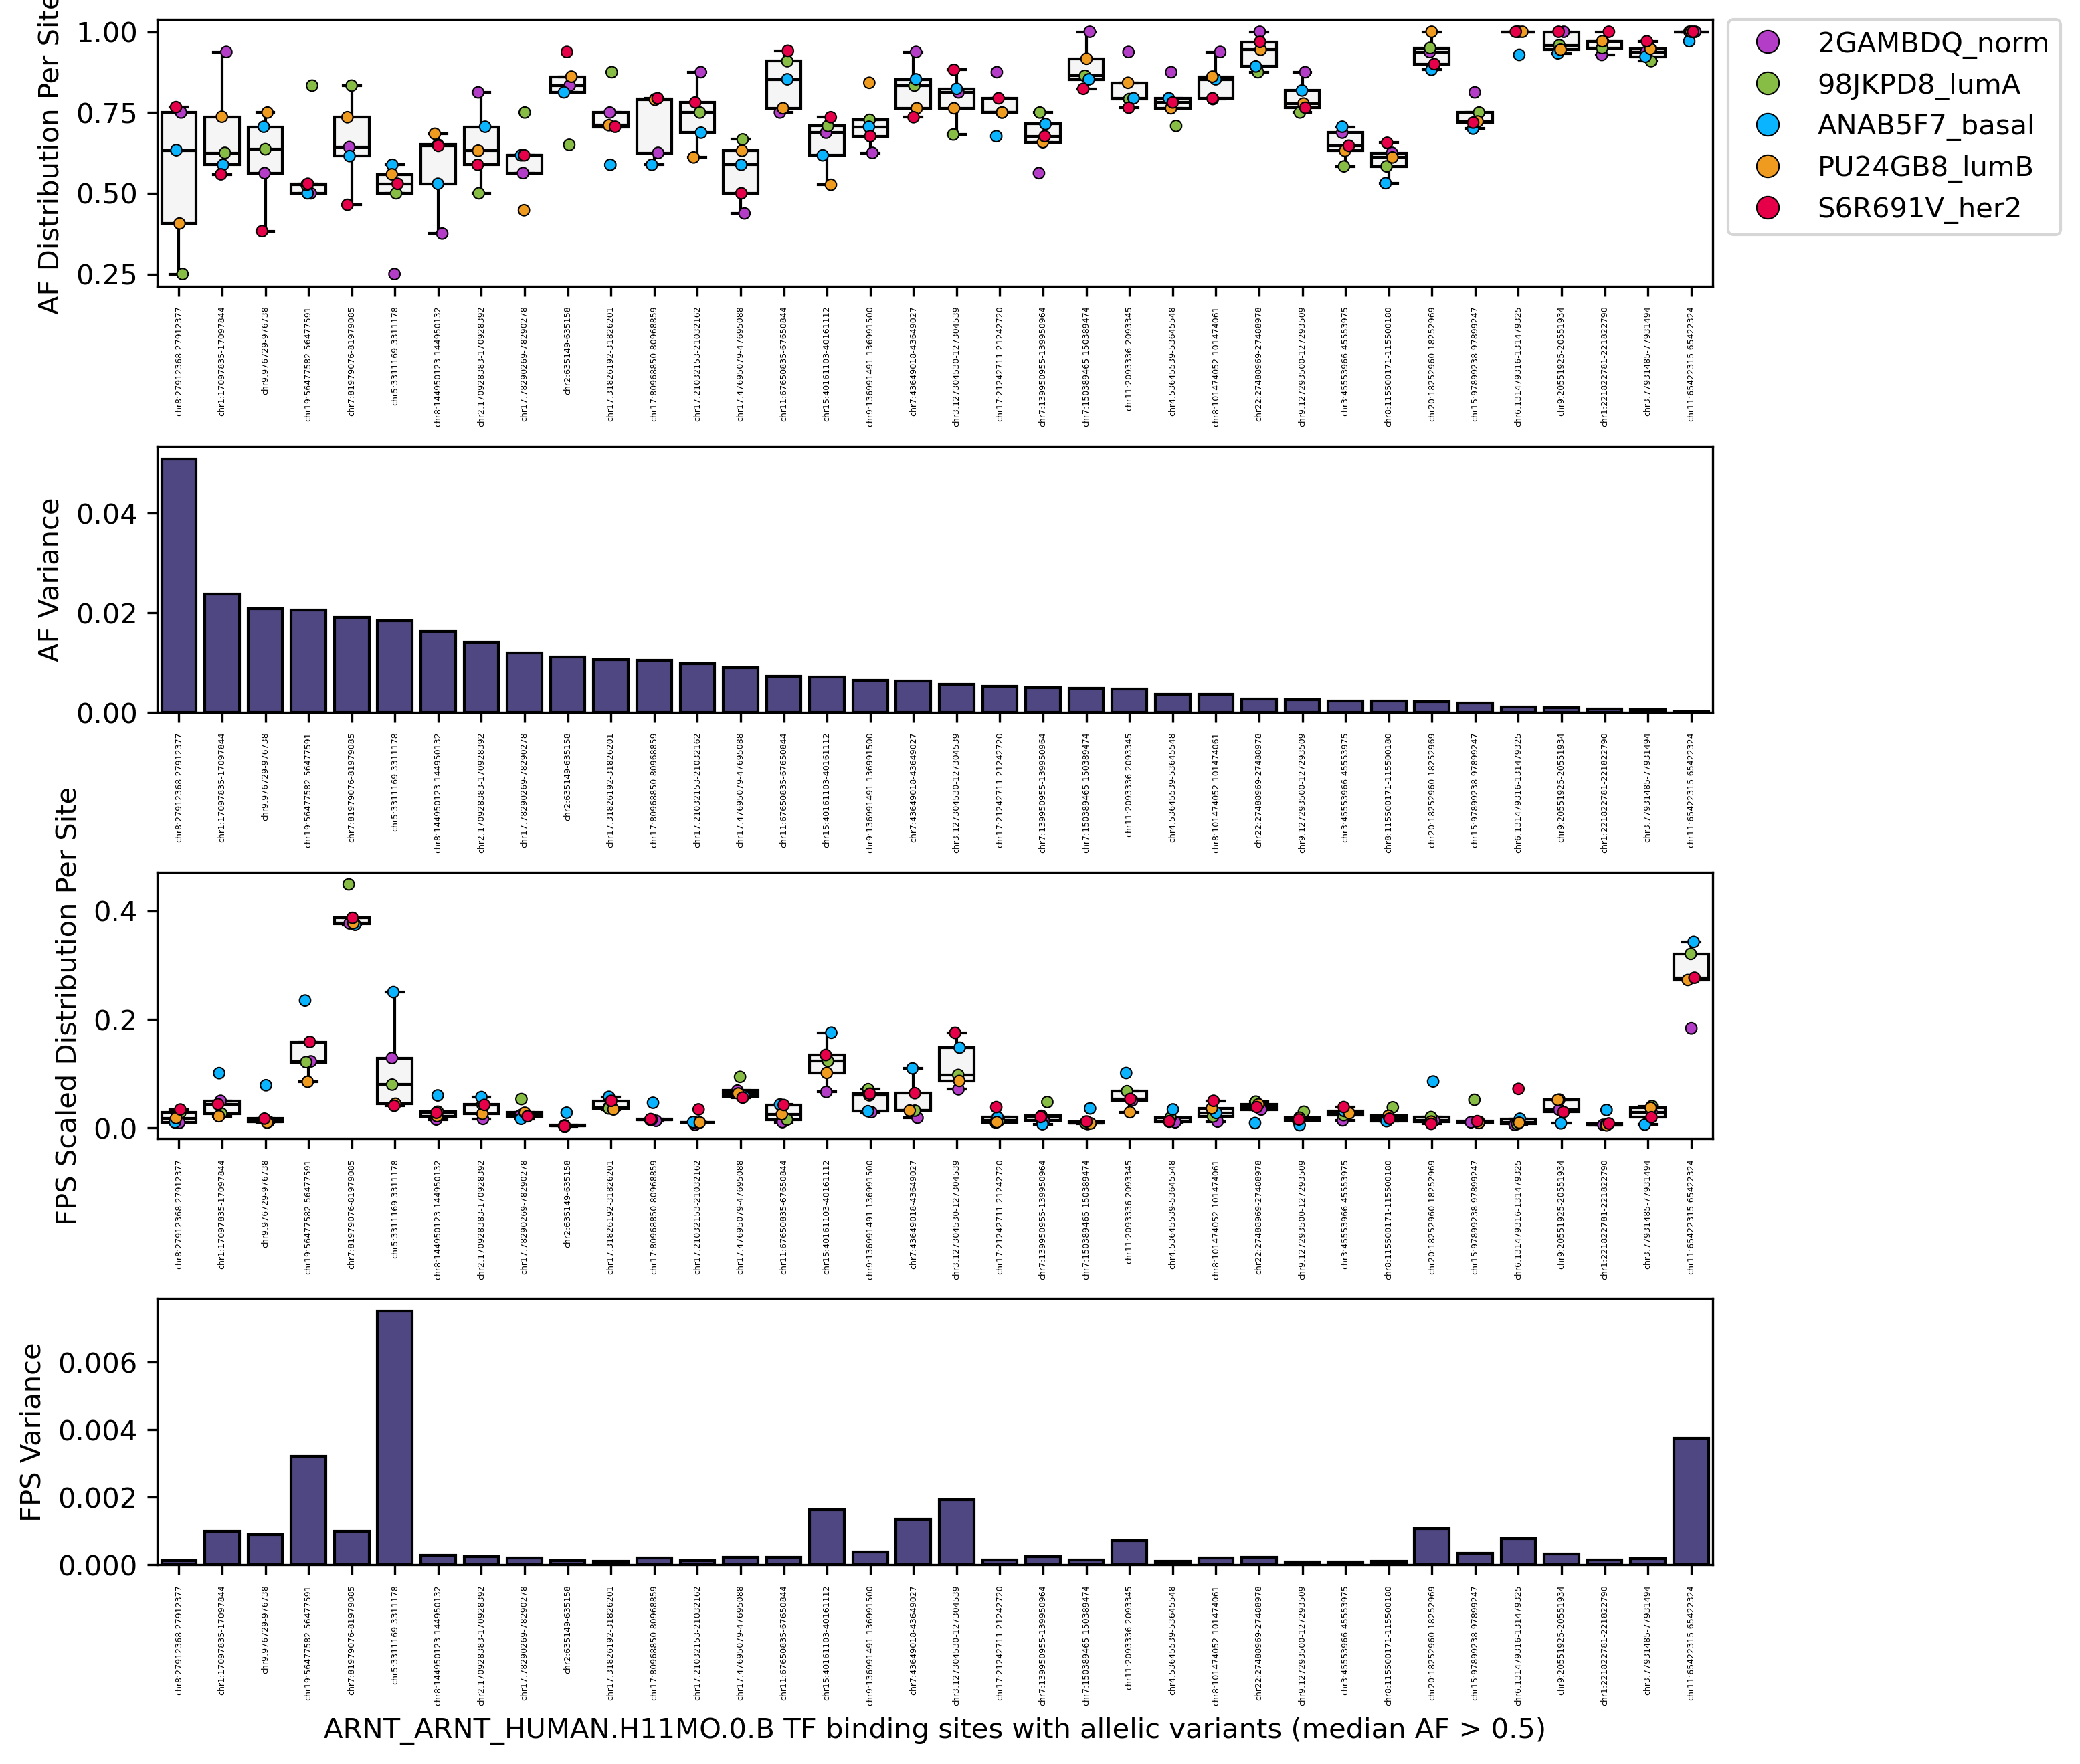

In [167]:
# create color dictionary
dutchfield_colordict = {'S6R691V_her2': "#e60049", 'ANAB5F7_basal': "#0bb4ff", '98JKPD8_lumA': "#87bc45", 'PU24GB8_lumB': "#ef9b20", '2GAMBDQ_norm': "#b33dc6"}
plt.figure(figsize=(10, 10), dpi=300)
# specify subplot
plt.subplot(4, 1, 1)
sns.boxplot(x='region_id', y='AF', data=high_nzaf_outlie_filtsort, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='AF', data=high_nzaf_outlie_filtsort, hue='sample_id', palette=dutchfield_colordict, size=4, jitter=True, linewidth=0.5, edgecolor='black')
plt.xticks(rotation=90, fontsize=3)
plt.xlabel('')
plt.ylabel('AF Distribution Per Site', fontsize=10)
# place legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)

plt.subplot(4, 1, 2)
sns.barplot(x='region_id', y='AF_var', data=high_nzaf_outlie_filtsort, color='darkslateblue', edgecolor='black')
plt.xticks(rotation=90, fontsize=3)
plt.xlabel('')
plt.ylabel('AF Variance', fontsize=10)
  
plt.subplot(4, 1, 3)
sns.boxplot(x='region_id', y='FPS_scaled', data=high_nzaf_outlie_filtsort, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='FPS_scaled', data=high_nzaf_outlie_filtsort, hue='sample_id', palette=dutchfield_colordict, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='black')
plt.xticks(rotation=90, fontsize=3)
plt.xlabel('')
plt.ylabel('FPS Scaled Distribution Per Site', fontsize=10)

plt.subplot(4, 1, 4)
sns.barplot(x='region_id', y='FPS_scaled_var', data=high_nzaf_outlie_filtsort, color='darkslateblue', edgecolor='black')
plt.xticks(rotation=90, fontsize=3)
plt.xlabel(f'{motif_id} TF binding sites with allelic variants (median AF > 0.5)', fontsize=10)
plt.ylabel('FPS Variance', fontsize=10)
plt.subplots_adjust(hspace=0.6)
plt.show()

For FPS distribution there are subtypes that are more represented that others. Let's try to selectively highlight subtypes which are the maxima per site. 

In [168]:
high_nzaf_outlie_filt

region_id      sample_id        AF      FPS  FPS_scaled  \
1400   chr8:27912368-27912377   2GAMBDQ_norm  0.750000  0.04184    0.009797   
1401   chr8:27912368-27912377   98JKPD8_lumA  0.250000  0.07305    0.028649   
1402   chr8:27912368-27912377  ANAB5F7_basal  0.633333  0.02576    0.010505   
1403   chr8:27912368-27912377   PU24GB8_lumB  0.406250  0.06293    0.018294   
1404   chr8:27912368-27912377   S6R691V_her2  0.766667  0.09848    0.034166   
...                       ...            ...       ...      ...         ...   
1885  chr11:65422315-65422324   2GAMBDQ_norm  1.000000  0.78487    0.183787   
1889  chr11:65422315-65422324   S6R691V_her2  1.000000  0.79836    0.276977   
1888  chr11:65422315-65422324   PU24GB8_lumB  1.000000  0.93851    0.272826   
1887  chr11:65422315-65422324  ANAB5F7_basal  0.970588  0.84151    0.343161   
1886  chr11:65422315-65422324   98JKPD8_lumA  1.000000  0.81862    0.321050   

       FPS_var  FPS_scaled_var  AF_median    AF_var  
1400  0.000790        0.000118   0.633333  0.050980  
1401  0.000790        0.000118   0.633333  0.050980  
1402  0.000790        0.000118   0.633333  0.050980  
1403  0.000790        0.000118   0.633333  0.050980  
1404  0.000790        0.000118   0.633333  0.050980  
...        ...             ...        ...       ...  
1885  0.003718        0.003748   1.000000  0.000173  
1889  0.003718        0.003748   1.000000  0.000173  
1888  0.003718        0.003748   1.000000  0.000173  
1887  0.003718        0.003748   1.000000  0.000173  
1886  0.003718        0.003748   1.000000  0.000173  

[180 rows x 9 columns]

In [169]:
# Find the index of the max FPS_scaled value for each region_id
idx_max = high_nzaf_outlie_filtsort.groupby('region_id', observed=True)['FPS_scaled'].idxmax()
idx_min = high_nzaf_outlie_filtsort.groupby('region_id', observed=True)['FPS_scaled'].idxmin()
# Select the corresponding rows
max_fps_scaled = high_nzaf_outlie_filtsort.loc[idx_max]
min_fps_scaled = high_nzaf_outlie_filtsort.loc[idx_min]

# do the same for AF
idx_max_af = high_nzaf_outlie_filtsort.groupby('region_id', observed=True)['AF'].idxmax()
idx_min_af = high_nzaf_outlie_filtsort.groupby('region_id', observed=True)['AF'].idxmin()
# Select the corresponding rows
max_af_raw = high_nzaf_outlie_filtsort.loc[idx_max_af]
min_af_raw = high_nzaf_outlie_filtsort.loc[idx_min_af]

In [170]:
# create masks for the inverse of max and min values
mask = ~high_nzaf_outlie_filtsort.index.isin(idx_max)
max_fps_scaled_inv = high_nzaf_outlie_filtsort[mask]

mask = ~high_nzaf_outlie_filtsort.index.isin(idx_min)
min_fps_scaled_inv = high_nzaf_outlie_filtsort[mask]

# do the same for AF
mask = ~high_nzaf_outlie_filtsort.index.isin(idx_max_af)
max_af_raw_inv = high_nzaf_outlie_filtsort[mask]

mask = ~high_nzaf_outlie_filtsort.index.isin(idx_min_af)
min_af_raw_inv = high_nzaf_outlie_filtsort[mask]

In [171]:
# create color dictionary
color_dict = {'S6R691V_her2': "#e60049", 'ANAB5F7_basal': "#0bb4ff", '98JKPD8_lumA': "#87bc45", 'PU24GB8_lumB': "#ef9b20", '2GAMBDQ_norm': "#b33dc6"}
gray = 'lightgray'
color_gray_dict = {'S6R691V_her2': gray, 'ANAB5F7_basal': gray, '98JKPD8_lumA': gray, 'PU24GB8_lumB': gray, '2GAMBDQ_norm': gray}
# color_dict = {'S6R691V_her2': 'orange', 'ANAB5F7_basal': 'lightseagreen', '98JKPD8_lumA': 'forestgreen', 'PU24GB8_lumB': 'dodgerblue', '2GAMBDQ_norm': 'darkviolet'}
# max_fps_scaled['color'] = max_fps_scaled['sample_id'].map(color_dict)
# min_fps_scaled['color'] = min_fps_scaled['sample_id'].map(color_dict)
# max_af_raw['color'] = max_af_raw['sample_id'].map(color_dict)
# min_af_raw['color'] = min_af_raw['sample_id'].map(color_dict)

In [172]:
color_gray_dict

{'S6R691V_her2': 'lightgray',
 'ANAB5F7_basal': 'lightgray',
 '98JKPD8_lumA': 'lightgray',
 'PU24GB8_lumB': 'lightgray',
 '2GAMBDQ_norm': 'lightgray'}

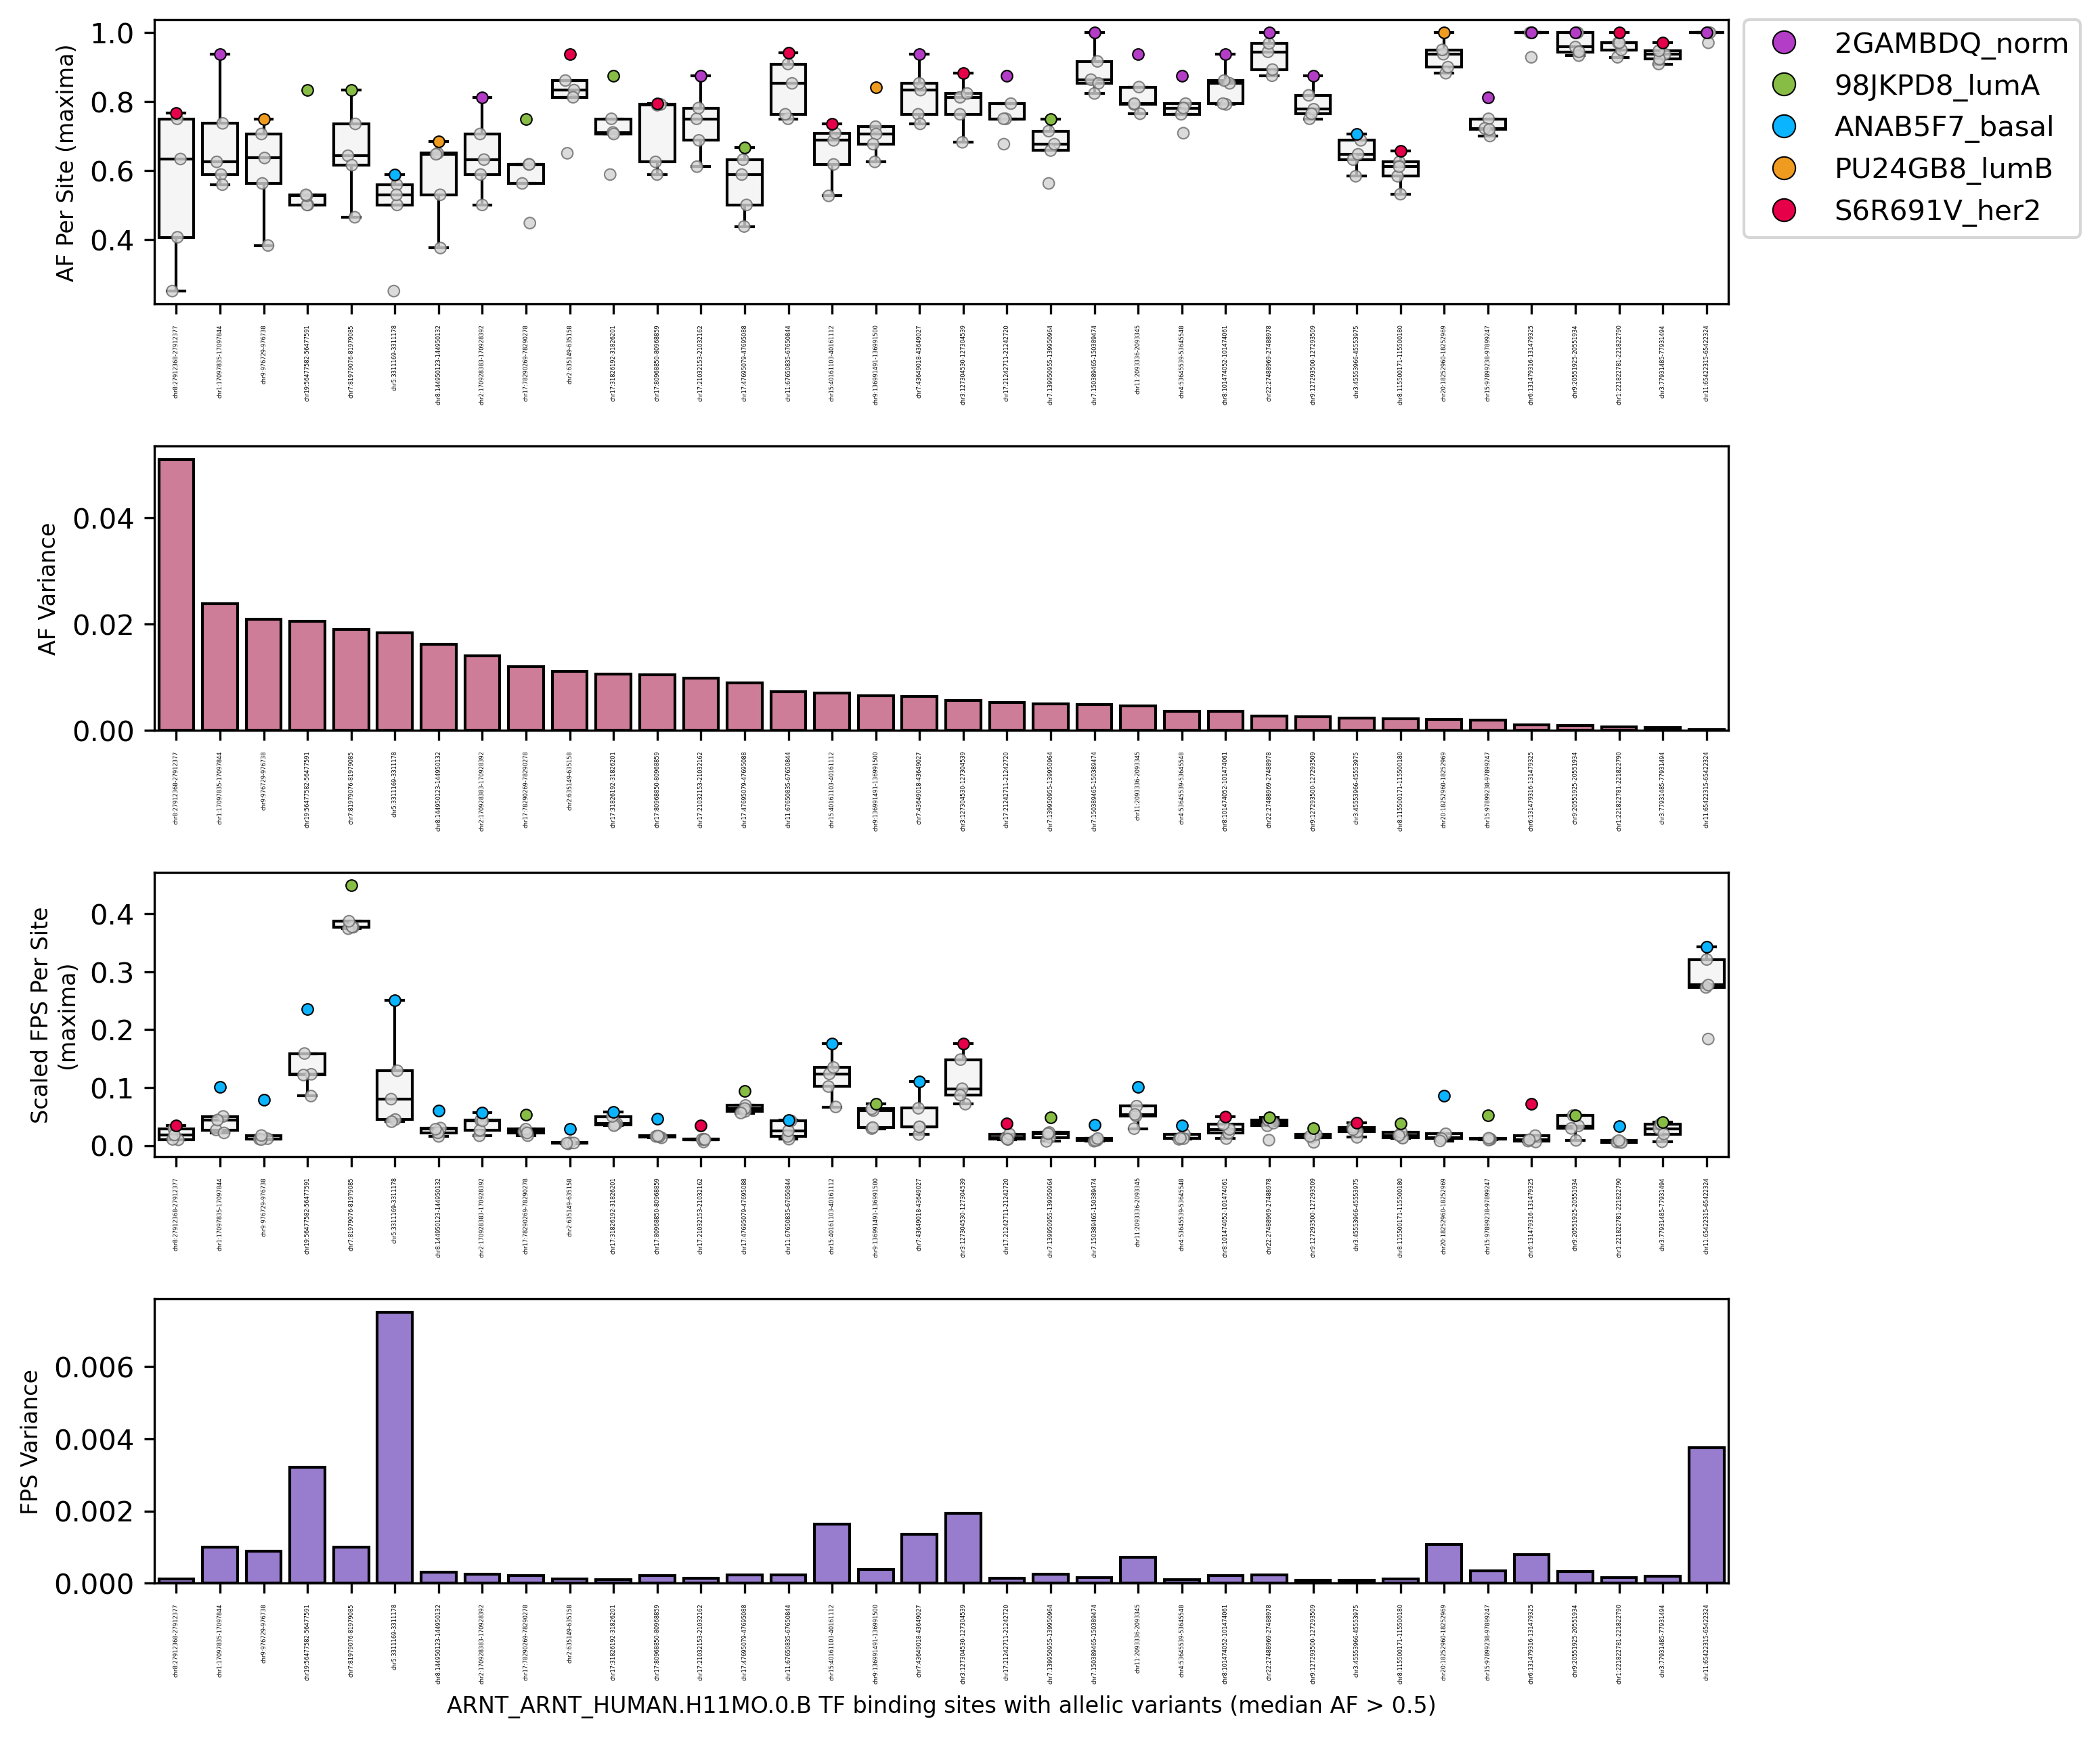

In [173]:
import textwrap
plt.figure(figsize=(10, 10), dpi=300)
# specify subplot
plt.subplot(4, 1, 1)
sns.boxplot(x='region_id', y='AF', data=high_nzaf_outlie_filtsort, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='AF', data=max_af_raw_inv, hue='sample_id', palette=color_gray_dict, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='dimgray', alpha=0.8)
sns.stripplot(x='region_id', y='AF', data=max_af_raw, hue='sample_id', palette=color_dict, size=4, jitter=True, linewidth=0.5, edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel('')
ylabel = textwrap.fill('AF Per Site (maxima)', width=20)
plt.ylabel(ylabel, fontsize=8)
# place legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)
plt.subplot(4, 1, 2)
sns.barplot(x='region_id', y='AF_var', data=high_nzaf_outlie_filtsort, color='palevioletred', edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel('')
plt.ylabel('AF Variance', fontsize=8)
  
plt.subplot(4, 1, 3)
sns.boxplot(x='region_id', y='FPS_scaled', data=high_nzaf_outlie_filtsort, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='FPS_scaled', data=max_fps_scaled_inv, hue='sample_id', palette=color_gray_dict, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='dimgray', alpha=0.8)
sns.stripplot(x='region_id', y='FPS_scaled', data=max_fps_scaled, hue='sample_id', palette=color_dict, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel('')
ylabel = textwrap.fill('Scaled FPS Per Site (maxima)', width=20)
plt.ylabel(ylabel, fontsize=8)

plt.subplot(4, 1, 4)
sns.barplot(x='region_id', y='FPS_scaled_var', data=high_nzaf_outlie_filtsort, color='mediumpurple', edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel(f'{motif_id} TF binding sites with allelic variants (median AF > 0.5)', fontsize=8)
plt.ylabel('FPS Variance', fontsize=8)
plt.subplots_adjust(hspace=0.5)

plt.show()

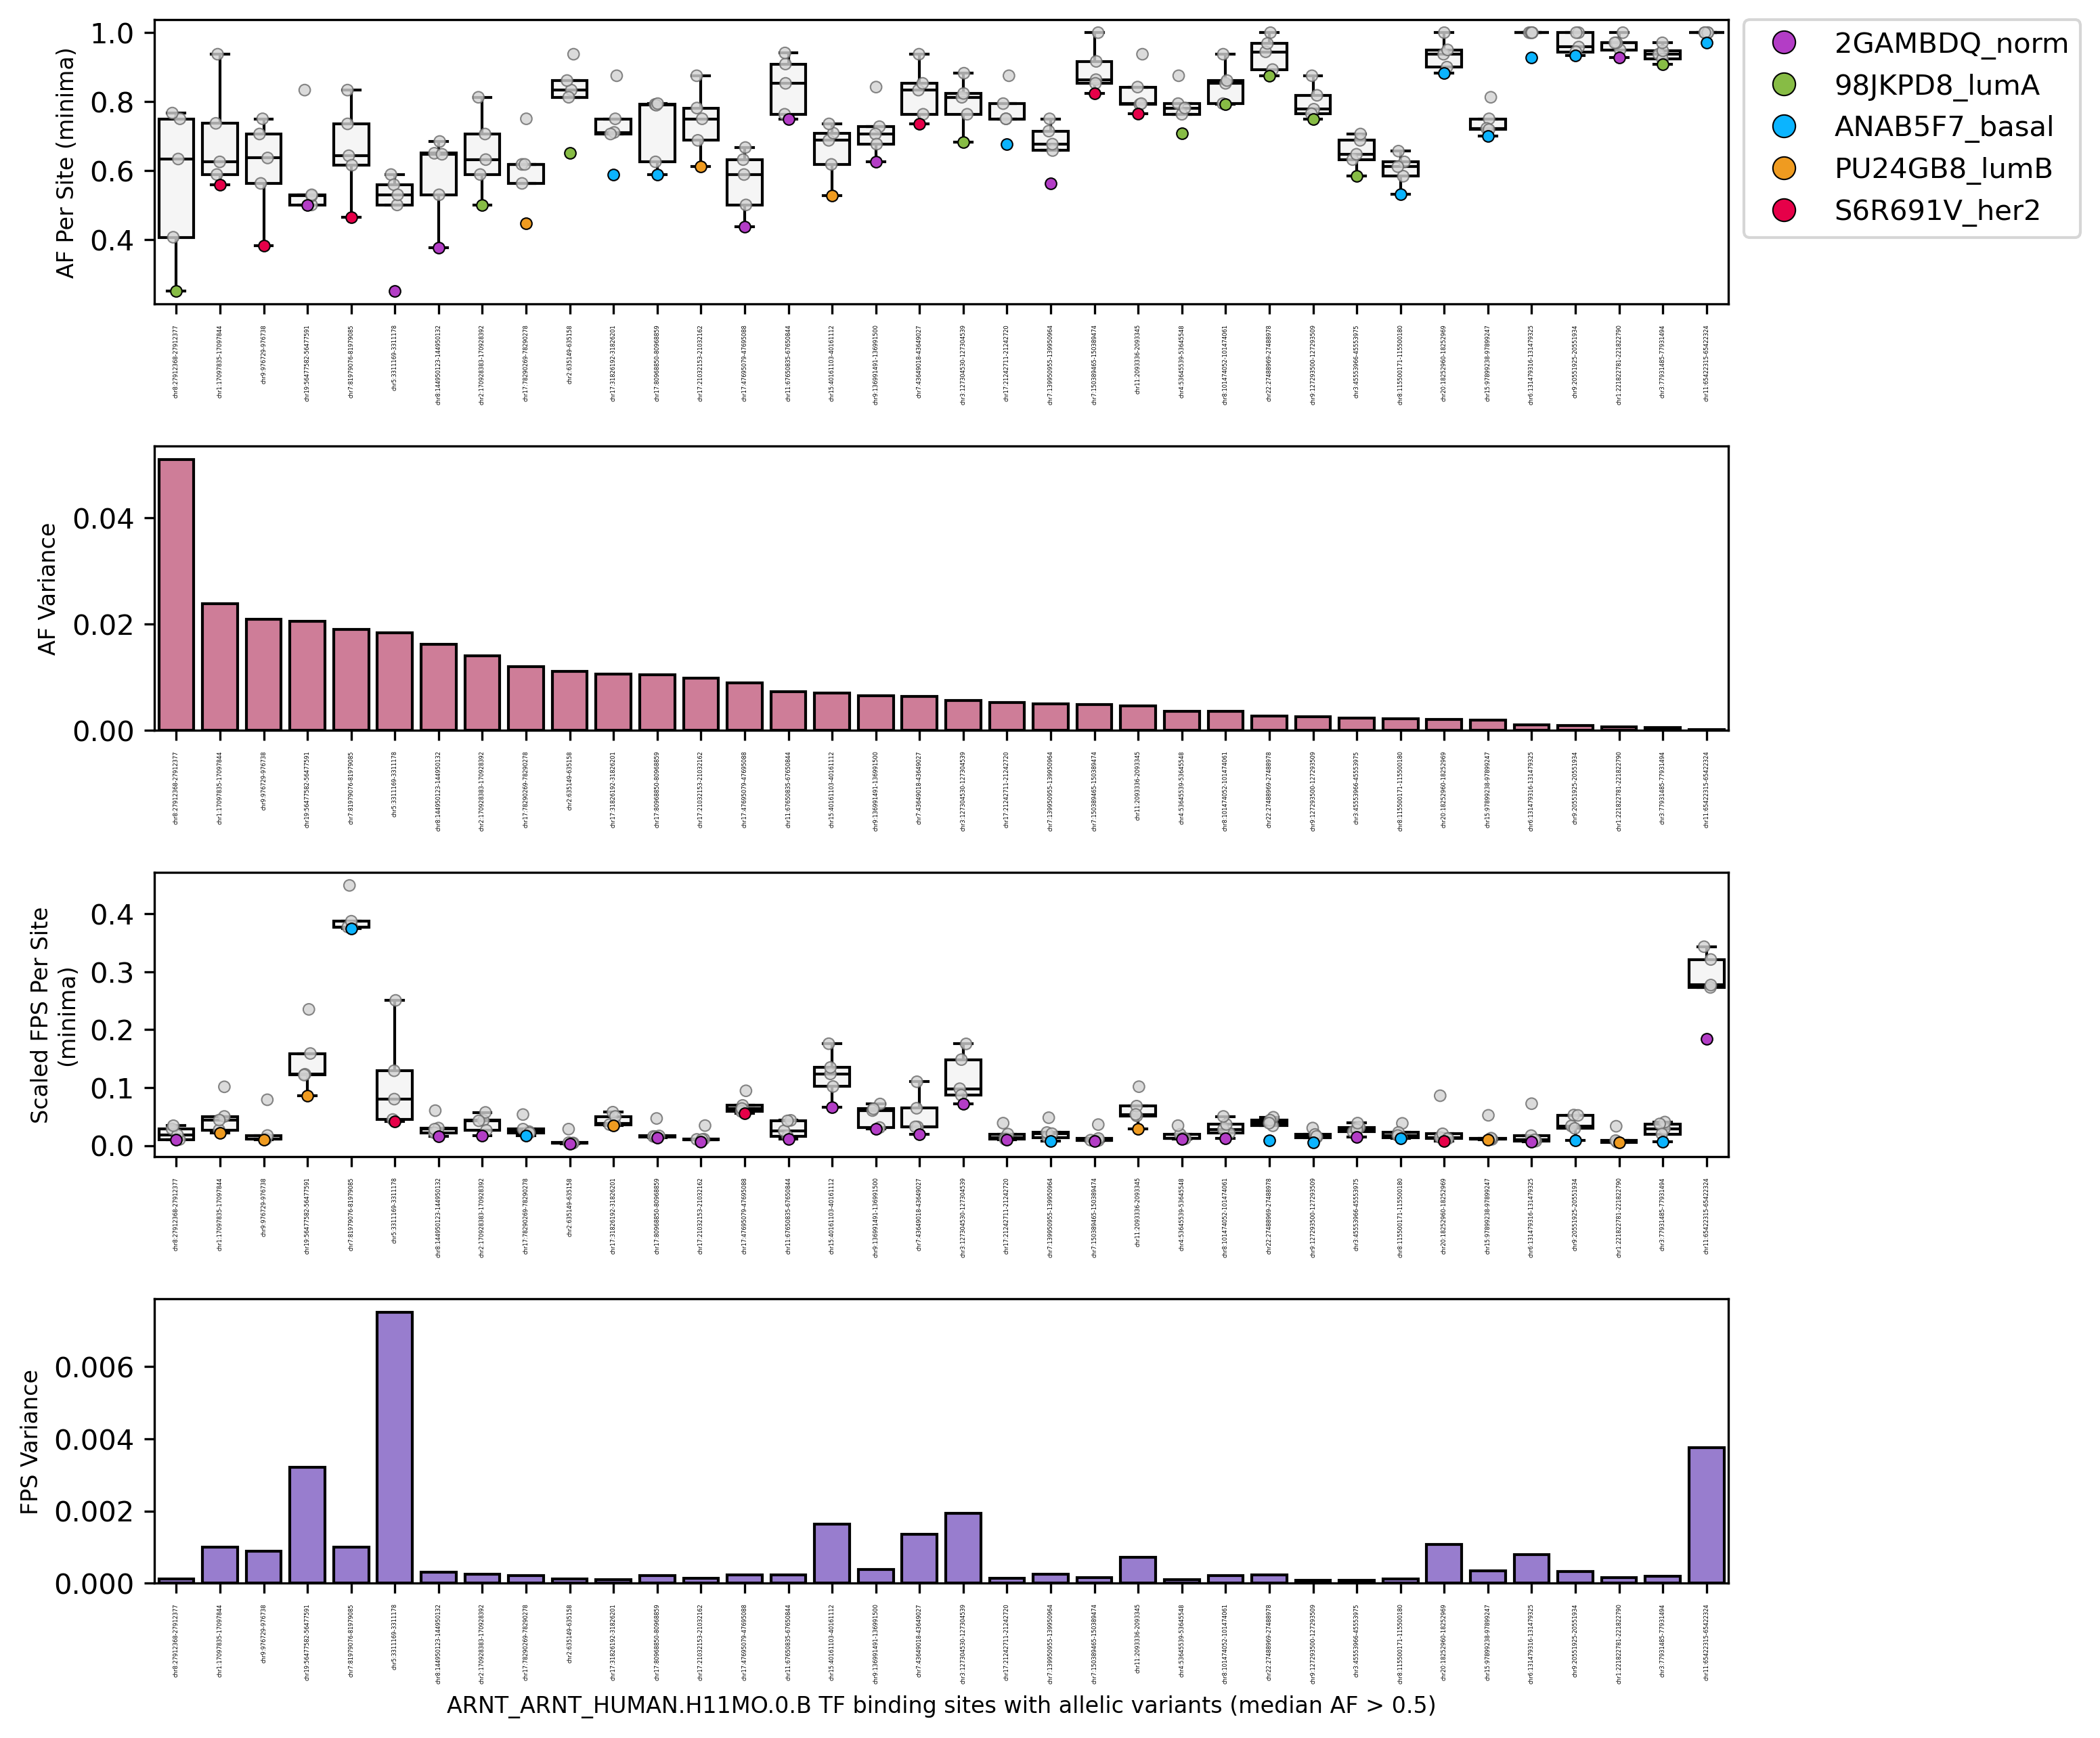

In [174]:
import textwrap
plt.figure(figsize=(10, 10), dpi=300)
# specify subplot
plt.subplot(4, 1, 1)
sns.boxplot(x='region_id', y='AF', data=high_nzaf_outlie_filtsort, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='AF', data=min_af_raw_inv, hue='sample_id', palette=color_gray_dict, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='dimgray', alpha=0.8)
sns.stripplot(x='region_id', y='AF', data=min_af_raw, hue='sample_id', palette=color_dict, size=4, jitter=True, linewidth=0.5, edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel('')
ylabel = textwrap.fill('AF Per Site (minima)', width=20)
plt.ylabel(ylabel, fontsize=8)
# place legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)
plt.subplot(4, 1, 2)
sns.barplot(x='region_id', y='AF_var', data=high_nzaf_outlie_filtsort, color='palevioletred', edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel('')
plt.ylabel('AF Variance', fontsize=8)
  
plt.subplot(4, 1, 3)
sns.boxplot(x='region_id', y='FPS_scaled', data=high_nzaf_outlie_filtsort, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='FPS_scaled', data=min_fps_scaled_inv, hue='sample_id', palette=color_gray_dict, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='dimgray', alpha=0.8)
sns.stripplot(x='region_id', y='FPS_scaled', data=min_fps_scaled, hue='sample_id', palette=color_dict, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel('')
ylabel = textwrap.fill('Scaled FPS Per Site (minima)', width=20)
plt.ylabel(ylabel, fontsize=8)

plt.subplot(4, 1, 4)
sns.barplot(x='region_id', y='FPS_scaled_var', data=high_nzaf_outlie_filtsort, color='mediumpurple', edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel(f'{motif_id} TF binding sites with allelic variants (median AF > 0.5)', fontsize=8)
plt.ylabel('FPS Variance', fontsize=8)
plt.subplots_adjust(hspace=0.5)

plt.show()

In [175]:
# quantify the number of filtered sites per sample_id
max_af_raw_subset = max_af_raw[['region_id', 'sample_id']]
max_af_raw_df = max_af_raw_subset.groupby('sample_id', observed=False)['region_id'].count().to_frame()

In [176]:
max_af_raw_df

region_id
sample_id               
2GAMBDQ_norm          15
98JKPD8_lumA           6
ANAB5F7_basal          2
PU24GB8_lumB           4
S6R691V_her2           9

In [177]:
max_fps_scaled_subset = max_fps_scaled[['region_id', 'sample_id']]
max_fps_scaled_df = max_fps_scaled_subset.groupby('sample_id', observed=False)['region_id'].count().to_frame()

In [178]:
max_fps_scaled_df

region_id
sample_id               
2GAMBDQ_norm           0
98JKPD8_lumA          11
ANAB5F7_basal         18
PU24GB8_lumB           0
S6R691V_her2           7

In [179]:
max_fps_scaled_subset

region_id      sample_id
4      chr8:27912368-27912377   S6R691V_her2
7      chr1:17097835-17097844  ANAB5F7_basal
12         chr9:976729-976738  ANAB5F7_basal
17    chr19:56477582-56477591  ANAB5F7_basal
21     chr7:81979076-81979085   98JKPD8_lumA
27       chr5:3311169-3311178  ANAB5F7_basal
32   chr8:144950123-144950132  ANAB5F7_basal
37   chr2:170928383-170928392  ANAB5F7_basal
41    chr17:78290269-78290278   98JKPD8_lumA
47         chr2:635149-635158  ANAB5F7_basal
52    chr17:31826192-31826201  ANAB5F7_basal
57    chr17:80968850-80968859  ANAB5F7_basal
64    chr17:21032153-21032162   S6R691V_her2
66    chr17:47695079-47695088   98JKPD8_lumA
72    chr11:67650835-67650844  ANAB5F7_basal
77    chr15:40161103-40161112  ANAB5F7_basal
81   chr9:136991491-136991500   98JKPD8_lumA
87     chr7:43649018-43649027  ANAB5F7_basal
94   chr3:127304530-127304539   S6R691V_her2
99    chr17:21242711-21242720   S6R691V_her2
101  chr7:139950955-139950964   98JKPD8_lumA
107  chr7:150389465-150389474  ANAB5F7_basal
112     chr11:2093336-2093345  ANAB5F7_basal
117    chr4:53645539-53645548  ANAB5F7_basal
124  chr8:101474052-101474061   S6R691V_her2
126   chr22:27488969-27488978   98JKPD8_lumA
131  chr9:127293500-127293509   98JKPD8_lumA
139    chr3:45553966-45553975   S6R691V_her2
141  chr8:115500171-115500180   98JKPD8_lumA
147   chr20:18252960-18252969  ANAB5F7_basal
151   chr15:97899238-97899247   98JKPD8_lumA
159  chr6:131479316-131479325   S6R691V_her2
161    chr9:20551925-20551934   98JKPD8_lumA
167  chr1:221822781-221822790  ANAB5F7_basal
171    chr3:77931485-77931494   98JKPD8_lumA
177   chr11:65422315-65422324  ANAB5F7_basal

In [180]:
high_nzaf_outlie_filtsort

region_id      sample_id        AF      FPS  FPS_scaled  \
0     chr8:27912368-27912377   2GAMBDQ_norm  0.750000  0.04184    0.009797   
1     chr8:27912368-27912377   98JKPD8_lumA  0.250000  0.07305    0.028649   
2     chr8:27912368-27912377  ANAB5F7_basal  0.633333  0.02576    0.010505   
3     chr8:27912368-27912377   PU24GB8_lumB  0.406250  0.06293    0.018294   
4     chr8:27912368-27912377   S6R691V_her2  0.766667  0.09848    0.034166   
..                       ...            ...       ...      ...         ...   
175  chr11:65422315-65422324   2GAMBDQ_norm  1.000000  0.78487    0.183787   
176  chr11:65422315-65422324   98JKPD8_lumA  1.000000  0.81862    0.321050   
177  chr11:65422315-65422324  ANAB5F7_basal  0.970588  0.84151    0.343161   
178  chr11:65422315-65422324   PU24GB8_lumB  1.000000  0.93851    0.272826   
179  chr11:65422315-65422324   S6R691V_her2  1.000000  0.79836    0.276977   

      FPS_var  FPS_scaled_var  AF_median    AF_var  
0    0.000790        0.000118   0.633333  0.050980  
1    0.000790        0.000118   0.633333  0.050980  
2    0.000790        0.000118   0.633333  0.050980  
3    0.000790        0.000118   0.633333  0.050980  
4    0.000790        0.000118   0.633333  0.050980  
..        ...             ...        ...       ...  
175  0.003718        0.003748   1.000000  0.000173  
176  0.003718        0.003748   1.000000  0.000173  
177  0.003718        0.003748   1.000000  0.000173  
178  0.003718        0.003748   1.000000  0.000173  
179  0.003718        0.003748   1.000000  0.000173  

[180 rows x 9 columns]

In [212]:
# load the counts
site_counts = pd.read_csv('/scratch/users/ntu/suffiazi/outputs/tmp/plotting-parallel/output-data/concat_tables/1360_motifs_variable_site_counts-sorted.tsv', sep='\t')
site_counts

motif_id      sample_id  max_AF_region_count  \
0     AHR_AHR_HUMAN.H11MO.0.B   S6R691V_her2                    7   
1     AHR_AHR_HUMAN.H11MO.0.B   PU24GB8_lumB                    5   
2     AHR_AHR_HUMAN.H11MO.0.B  ANAB5F7_basal                    6   
3     AHR_AHR_HUMAN.H11MO.0.B   98JKPD8_lumA                   10   
4     AHR_AHR_HUMAN.H11MO.0.B   2GAMBDQ_norm                   15   
...                       ...            ...                  ...   
6795      ZSCAN5C_M08390_2.00   PU24GB8_lumB                    9   
6796      ZSCAN5C_M08390_2.00   2GAMBDQ_norm                   42   
6797      ZSCAN5C_M08390_2.00   98JKPD8_lumA                   24   
6798      ZSCAN5C_M08390_2.00   S6R691V_her2                   15   
6799      ZSCAN5C_M08390_2.00  ANAB5F7_basal                   10   

      max_FPS_region_count  
0                        5  
1                        2  
2                       26  
3                        9  
4                        1  
...                    ...  
6795                     8  
6796                     4  
6797                    26  
6798                    23  
6799                    39  

[6800 rows x 4 columns]

In [213]:
# sort sample_id column naturally, by motif_id grouping
site_counts_sorted = site_counts.sort_values(by=['motif_id', 'sample_id'])
site_counts_sorted

motif_id      sample_id  max_AF_region_count  \
4     AHR_AHR_HUMAN.H11MO.0.B   2GAMBDQ_norm                   15   
3     AHR_AHR_HUMAN.H11MO.0.B   98JKPD8_lumA                   10   
2     AHR_AHR_HUMAN.H11MO.0.B  ANAB5F7_basal                    6   
1     AHR_AHR_HUMAN.H11MO.0.B   PU24GB8_lumB                    5   
0     AHR_AHR_HUMAN.H11MO.0.B   S6R691V_her2                    7   
...                       ...            ...                  ...   
6796      ZSCAN5C_M08390_2.00   2GAMBDQ_norm                   42   
6797      ZSCAN5C_M08390_2.00   98JKPD8_lumA                   24   
6799      ZSCAN5C_M08390_2.00  ANAB5F7_basal                   10   
6795      ZSCAN5C_M08390_2.00   PU24GB8_lumB                    9   
6798      ZSCAN5C_M08390_2.00   S6R691V_her2                   15   

      max_FPS_region_count  
4                        1  
3                        9  
2                       26  
1                        2  
0                        5  
...                    ...  
6796                     4  
6797                    26  
6799                    39  
6795                     8  
6798                    23  

[6800 rows x 4 columns]

In [214]:
# sum the total filtered sites where FPS variance is considered outliers, based on AF variance 
sumsite_af_sorted_df = site_counts_sorted.groupby('motif_id')['max_AF_region_count'].sum().sort_values(ascending=False).to_frame()
sumsite_af_sorted_df

max_AF_region_count
motif_id                                        
ZNF287_M07590_2.00                          2183
ZNF235_M07605_2.00                          2120
ZNF432_M07773_2.00                          1848
ZFP28_M08378_2.00                           1840
ZNF487_M07782_2.00                          1837
...                                          ...
PRRX2_PRRX2_HUMAN.H11MO.0.C                   27
NOBOX_NOBOX_HUMAN.H11MO.0.C                   24
ZNF547_M07600_2.00                            22
ZNF777_M07703_2.00                             9
ZNF669_M08262_2.00                             8

[1360 rows x 1 columns]

In [215]:
# set categorical order for motif_id
site_counts_sorted['motif_id'] = pd.Categorical(site_counts_sorted['motif_id'], categories=sumsite_af_sorted_df.index, ordered=True)
site_counts_sorted = site_counts_sorted.sort_values('motif_id')
site_counts_sorted

motif_id      sample_id  max_AF_region_count  \
5354  ZNF287_M07590_2.00   S6R691V_her2                  291   
5352  ZNF287_M07590_2.00  ANAB5F7_basal                  313   
5351  ZNF287_M07590_2.00   98JKPD8_lumA                  488   
5350  ZNF287_M07590_2.00   2GAMBDQ_norm                  751   
5353  ZNF287_M07590_2.00   PU24GB8_lumB                  340   
...                  ...            ...                  ...   
6271  ZNF669_M08262_2.00   PU24GB8_lumB                    1   
6272  ZNF669_M08262_2.00  ANAB5F7_basal                    2   
6273  ZNF669_M08262_2.00   98JKPD8_lumA                    3   
6274  ZNF669_M08262_2.00   2GAMBDQ_norm                    2   
6270  ZNF669_M08262_2.00   S6R691V_her2                    0   

      max_FPS_region_count  
5354                   294  
5352                   924  
5351                   677  
5350                   151  
5353                   137  
...                    ...  
6271                     4  
6272                     4  
6273                     0  
6274                     0  
6270                     0  

[6800 rows x 4 columns]

In [ ]:
# now sort the sample_id column naturally
site_counts_sorted['sample_id'] = pd.Categorical(site_counts_sorted['sample_id'], categories=datasets, ordered=True)

In [216]:
pivot_df = site_counts_sorted.pivot(index='motif_id', columns='sample_id', values='max_AF_region_count').fillna(0)
pivot_df

sample_id                    2GAMBDQ_norm  98JKPD8_lumA  ANAB5F7_basal  \
motif_id                                                                 
ZNF287_M07590_2.00                    751           488            313   
ZNF235_M07605_2.00                    737           468            314   
ZNF432_M07773_2.00                    624           377            294   
ZFP28_M08378_2.00                     624           386            266   
ZNF487_M07782_2.00                    642           394            257   
...                                   ...           ...            ...   
PRRX2_PRRX2_HUMAN.H11MO.0.C            12             7              1   
NOBOX_NOBOX_HUMAN.H11MO.0.C            10             3              7   
ZNF547_M07600_2.00                      6             6              3   
ZNF777_M07703_2.00                      3             3              1   
ZNF669_M08262_2.00                      2             3              2   

sample_id                    PU24GB8_lumB  S6R691V_her2  
motif_id                                                 
ZNF287_M07590_2.00                    340           291  
ZNF235_M07605_2.00                    325           276  
ZNF432_M07773_2.00                    260           293  
ZFP28_M08378_2.00                     299           265  
ZNF487_M07782_2.00                    285           259  
...                                   ...           ...  
PRRX2_PRRX2_HUMAN.H11MO.0.C             2             5  
NOBOX_NOBOX_HUMAN.H11MO.0.C             3             1  
ZNF547_M07600_2.00                      3             4  
ZNF777_M07703_2.00                      1             1  
ZNF669_M08262_2.00                      1             0  

[1360 rows x 5 columns]

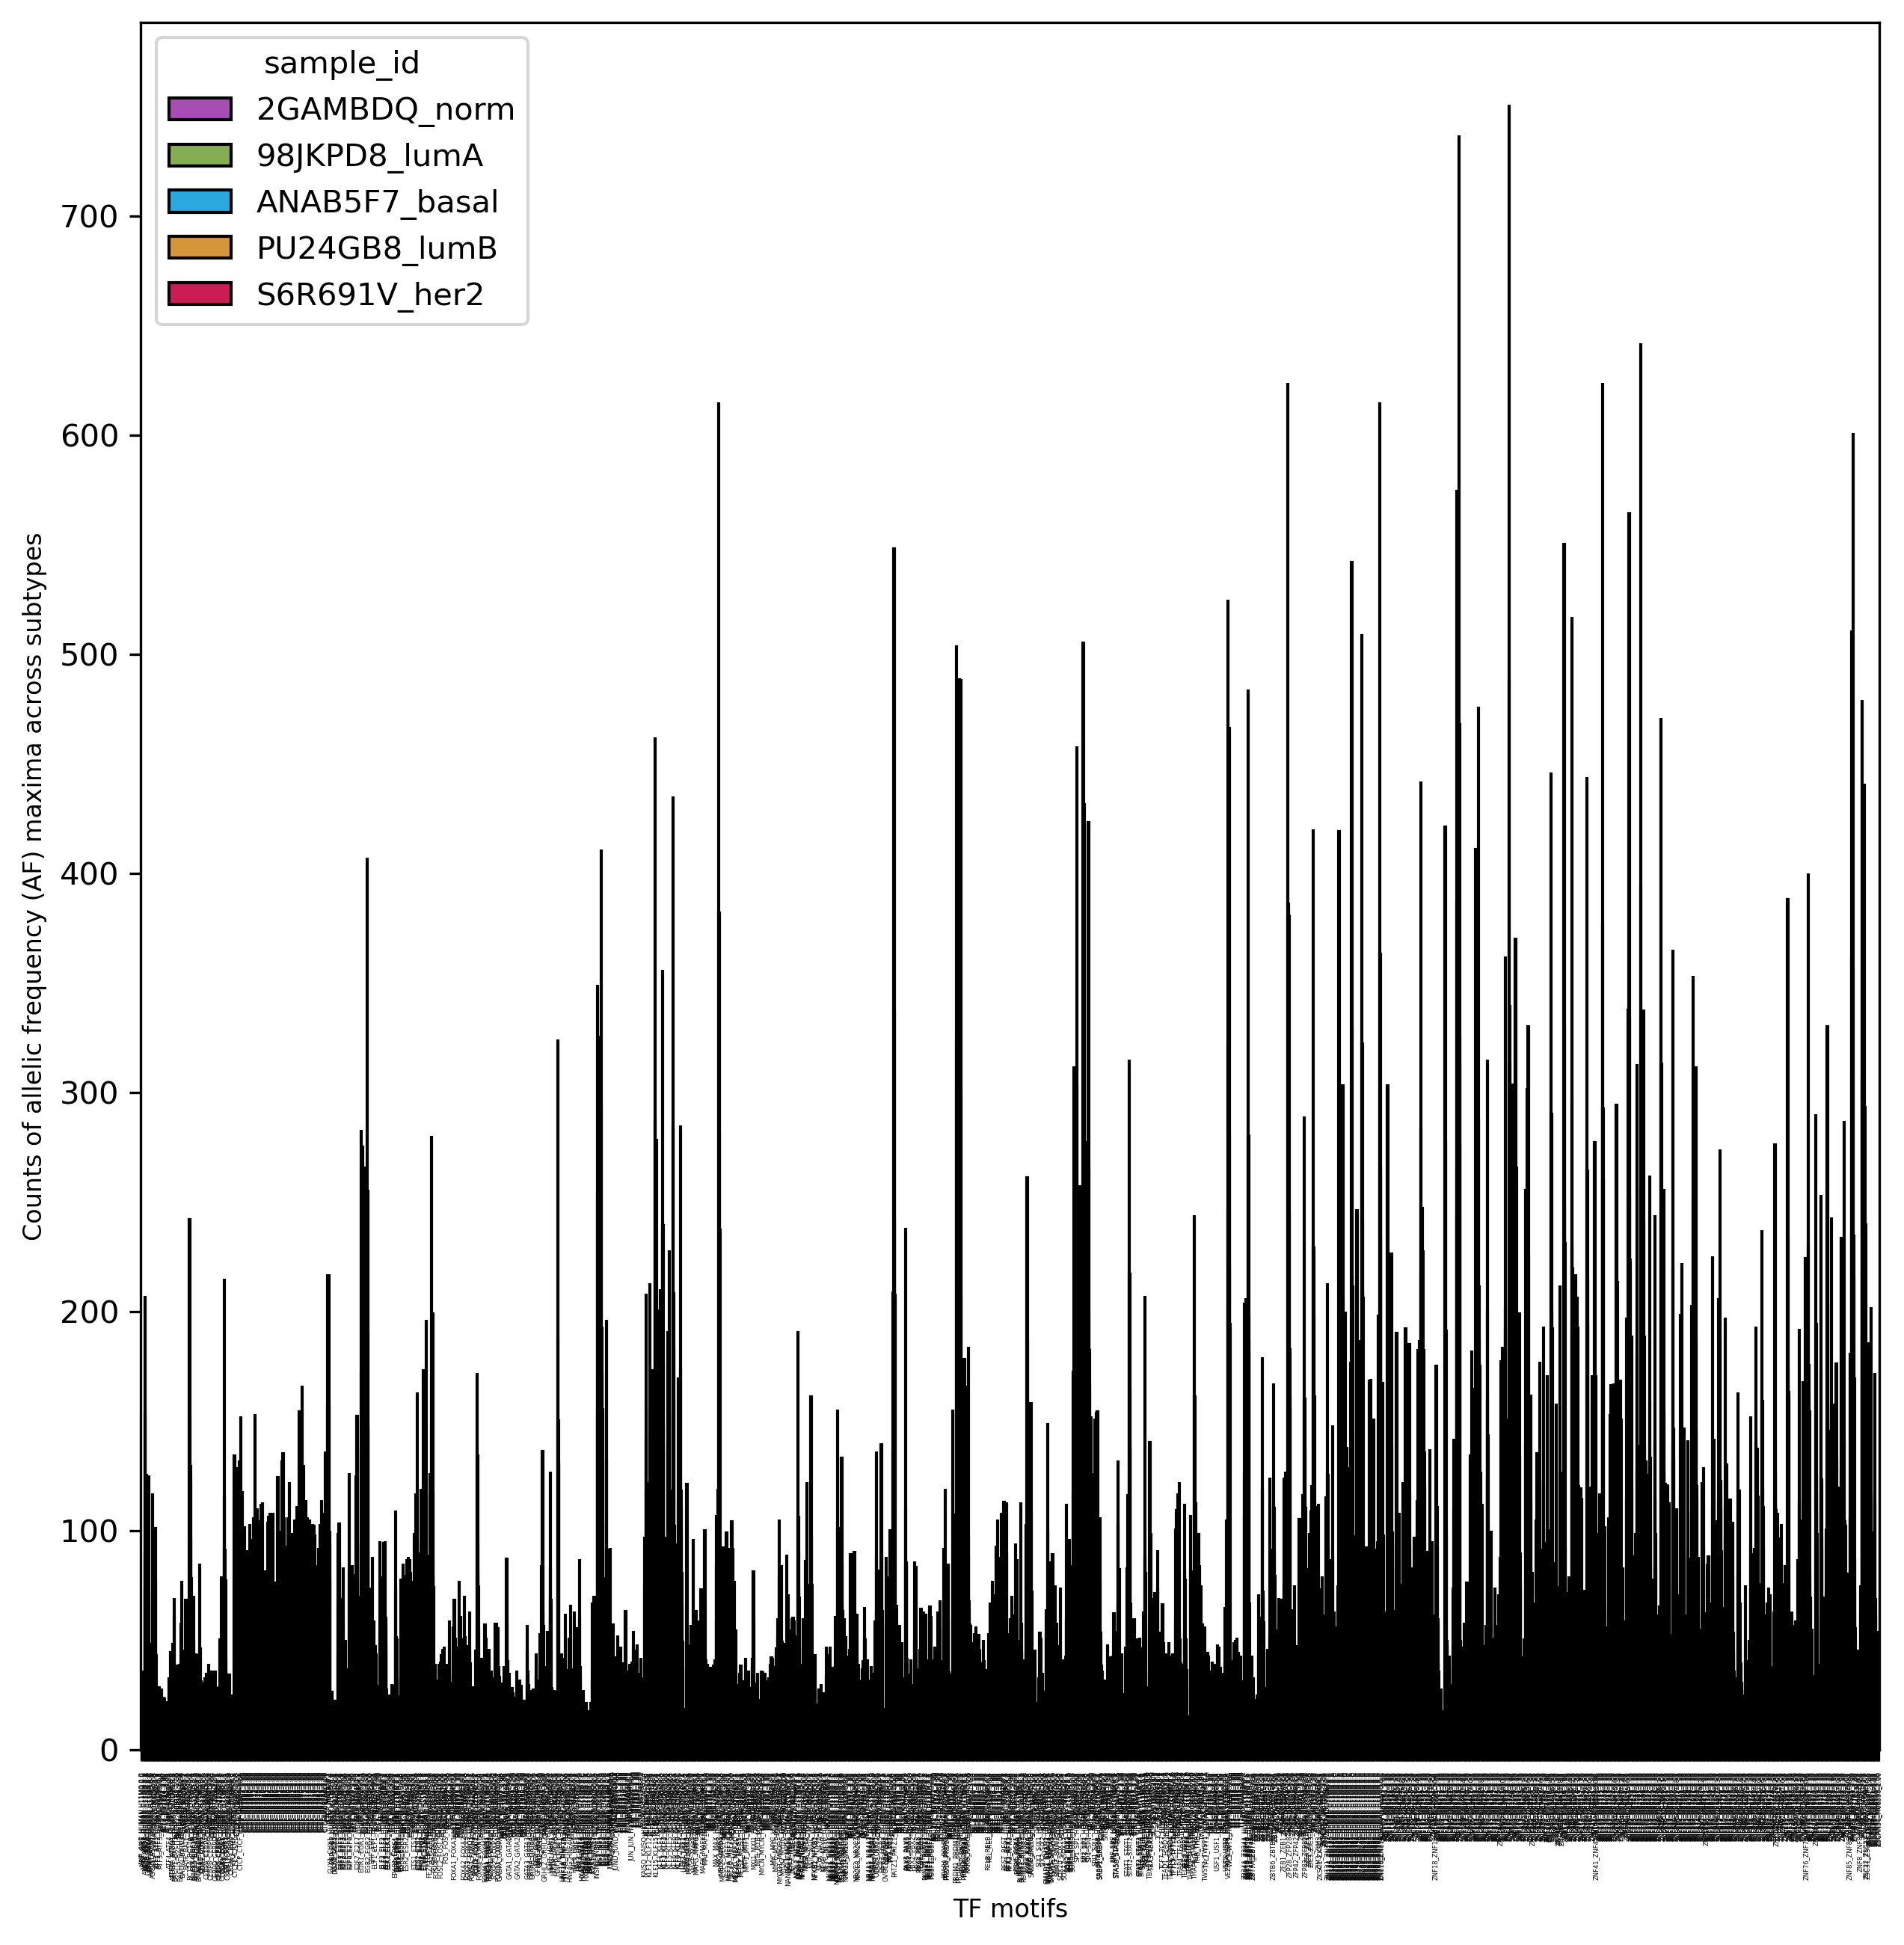

In [190]:
# plot a barplot of the counts hued by sample_id and grouped by motif_id
plt.figure(figsize=(10, 10), dpi=300)
sns.barplot(x='motif_id', y='max_AF_region_count', data=site_counts_sorted, hue='sample_id', palette=dutchfield_colordict, edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel(f'TF motifs', fontsize=8)
plt.ylabel('Counts of allelic frequency (AF) maxima across subtypes', fontsize=8)
plt.show()

In [188]:
# calculate correlation between AF and FPS for each sample_id
# create a list of sample_id values
sample_ids = site_counts_sorted['sample_id'].unique().tolist()
sample_ids



motif_id      sample_id  max_AF_region_count  \
4     AHR_AHR_HUMAN.H11MO.0.B   2GAMBDQ_norm                   15   
3     AHR_AHR_HUMAN.H11MO.0.B   98JKPD8_lumA                   10   
2     AHR_AHR_HUMAN.H11MO.0.B  ANAB5F7_basal                    6   
1     AHR_AHR_HUMAN.H11MO.0.B   PU24GB8_lumB                    5   
0     AHR_AHR_HUMAN.H11MO.0.B   S6R691V_her2                    7   
...                       ...            ...                  ...   
6796      ZSCAN5C_M08390_2.00   2GAMBDQ_norm                   42   
6797      ZSCAN5C_M08390_2.00   98JKPD8_lumA                   24   
6799      ZSCAN5C_M08390_2.00  ANAB5F7_basal                   10   
6795      ZSCAN5C_M08390_2.00   PU24GB8_lumB                    9   
6798      ZSCAN5C_M08390_2.00   S6R691V_her2                   15   

      max_FPS_region_count  AFmax_FPSmax_corr  
4                        1                NaN  
3                        9                NaN  
2                       26                NaN  
1                        2                NaN  
0                        5                NaN  
...                    ...                ...  
6796                     4                NaN  
6797                    26                NaN  
6799                    39                NaN  
6795                     8                NaN  
6798                    23                NaN  

[6800 rows x 5 columns]